#Machine Learning Assignmnet (Fairness Vs Accuracy for Classifiers)

#Task 1

##Adult Dataset

In [1]:
#installing fairlearn and aif360 ML fairness libraries
!pip install 'aif360[LFR]'
!pip install "fairlearn"

In [2]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [3]:
#getting the Adult dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-13 14:21:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3.79M  6.25MB/s    in 0.6s    

2022-05-13 14:21:30 (6.25 MB/s) - ‘adult.data.1’ saved [3974305/3974305]

--2022-05-13 14:21:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names.1’

adult.names.1       100%[===================>]   5.11K  --.-KB/s    in 0s      


In [4]:
#importing essential libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import aif360
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult, load_preproc_data_german
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
from aif360.sklearn.datasets import fetch_adult
from aif360.sklearn.metrics import disparate_impact_ratio, average_odds_error, generalized_fpr
from aif360.sklearn.metrics import generalized_fnr, difference
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import *
np.random.seed(0)

In [5]:
#function to load the datasets 
def load_data(data=""):
  if data=="Adult":
    privileged_groups = [{'sex': 1}]
    unprivileged_groups = [{'sex': 0}]
    dataset_orig = load_preproc_data_adult(['sex'])
  elif data=="German":
    privileged_groups = [{'sex': 1}]
    unprivileged_groups = [{'sex': 0}]
    dataset_orig = load_preproc_data_german(['sex'])
  return dataset_orig

In [6]:
#putting the adult data into a pandas df to get a sense of it
adult_dataset_orig=load_data(data="Adult") 
adult_df=pd.DataFrame(data=adult_dataset_orig.features,columns=adult_dataset_orig.feature_names)
adult_df

,race,sex,Age (decade)=10,Age (decade)=20,Age (decade)=30,Age (decade)=40,Age (decade)=50,Age (decade)=60,Age (decade)=>=70,Education Years=6,Education Years=7,Education Years=8,Education Years=9,Education Years=10,Education Years=11,Education Years=12,Education Years=<6,Education Years=>12
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48839,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
48840,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#splitting the adult dataset into training and testing files 
adult_train, adult_test = adult_dataset_orig.split([0.7], shuffle=True)
# print out some labels, names, etc.
print("###Training Dataset shape")
print(adult_train.features.shape)
print("#### Favorable and unfavorable labels")
print(adult_train.favorable_label, adult_train.unfavorable_label)
print("#### Protected attribute names")
print(adult_train.protected_attribute_names)
print("#### Privileged and unprivileged protected attribute values")
print(adult_train.privileged_protected_attributes,adult_train.unprivileged_protected_attributes)
print("#### Dataset feature names")
print(adult_train.feature_names)

###Training Dataset shape
(34189, 18)
#### Favorable and unfavorable labels
1.0 0.0
#### Protected attribute names
['sex']
#### Privileged and unprivileged protected attribute values
[array([1.])] [array([0.])]
#### Dataset feature names
['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [8]:
#Normalizing the data
scaler = StandardScaler()
adult_x_train = scaler.fit_transform(adult_train.features)
adult_y_train = adult_train.labels.ravel()
yt_data_copied = adult_train.copy()

adult_x_test = scaler.transform(adult_test.features) 
adult_y_test = adult_test.labels.ravel()

In [9]:
#previlaged and unprevilaged groups
adult_privileged_groups = [{'sex': 1}]
adult_unprivileged_groups = [{'sex': 0}]
#carrying out kfolds cross validatoin on the training data 
C_LR=[0.001,0.005,0.01,0.1,1,10,20,100,200,1000] #
solver_LR=['saga', 'liblinear']
penalty_LR=['l1','l2']

adult_results=[]

kf_cv= KFold(n_splits=5, random_state=42, shuffle=True) #k_fold cross validation 
for k_fold, (train_idx,test_idx) in enumerate(kf_cv.split(adult_x_train,adult_y_train)):
  #print("train", train_idx, "test", test_idx)
  x_train_kf, x_test_kf= adult_x_train[train_idx], adult_x_train[test_idx]
  y_train_kf, y_test_kf = adult_y_train[train_idx], adult_y_train[test_idx]

  #trying the k_fold with different hyperparameter combinations  on the model 
  for c in C_LR:
    for solver in solver_LR:
      for penalty in penalty_LR:
        print(f"C= {c}, solver= {solver}, penalty= {penalty}, fold= {k_fold+1}")
        LR_learner=LogisticRegression(C=c,solver=solver,penalty=penalty)#Logistic regression classifier 
        LR_learner.fit(x_train_kf,y_train_kf) #fitting the folds 
        predictions= LR_learner.predict(x_test_kf) #predicting the outcome on the test fold 
        test_pred= yt_data_copied.subset(test_idx)
        test_pred.labels= predictions
        model_acc = sum(predictions==y_test_kf)/len(y_test_kf)
        fairness_metric= ClassificationMetric(yt_data_copied.subset(test_idx),test_pred , unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)#fairness metric
        equal_opp= fairness_metric.equal_opportunity_difference() #equal opportunity fairness metric 
        #c_matrix=fairness_metric.binary_confusion_matrix(privileged=privileged_groups)
        adult_results.append((model_acc,equal_opp,c,solver,penalty,k_fold+1))


C= 0.001, solver= saga, penalty= l1, fold= 1
C= 0.001, solver= saga, penalty= l2, fold= 1
C= 0.001, solver= liblinear, penalty= l1, fold= 1
C= 0.001, solver= liblinear, penalty= l2, fold= 1
C= 0.005, solver= saga, penalty= l1, fold= 1
C= 0.005, solver= saga, penalty= l2, fold= 1
C= 0.005, solver= liblinear, penalty= l1, fold= 1
C= 0.005, solver= liblinear, penalty= l2, fold= 1
C= 0.01, solver= saga, penalty= l1, fold= 1
C= 0.01, solver= saga, penalty= l2, fold= 1
C= 0.01, solver= liblinear, penalty= l1, fold= 1
C= 0.01, solver= liblinear, penalty= l2, fold= 1
C= 0.1, solver= saga, penalty= l1, fold= 1
C= 0.1, solver= saga, penalty= l2, fold= 1
C= 0.1, solver= liblinear, penalty= l1, fold= 1
C= 0.1, solver= liblinear, penalty= l2, fold= 1
C= 1, solver= saga, penalty= l1, fold= 1
C= 1, solver= saga, penalty= l2, fold= 1
C= 1, solver= liblinear, penalty= l1, fold= 1
C= 1, solver= liblinear, penalty= l2, fold= 1
C= 10, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 1
C= 10, solver= liblinear, penalty= l1, fold= 1
C= 10, solver= liblinear, penalty= l2, fold= 1
C= 20, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 1
C= 20, solver= liblinear, penalty= l1, fold= 1
C= 20, solver= liblinear, penalty= l2, fold= 1
C= 100, solver= saga, penalty= l1, fold= 1
C= 100, solver= saga, penalty= l2, fold= 1
C= 100, solver= liblinear, penalty= l1, fold= 1
C= 100, solver= liblinear, penalty= l2, fold= 1
C= 200, solver= saga, penalty= l1, fold= 1
C= 200, solver= saga, penalty= l2, fold= 1
C= 200, solver= liblinear, penalty= l1, fold= 1
C= 200, solver= liblinear, penalty= l2, fold= 1
C= 1000, solver= saga, penalty= l1, fold= 1
C= 1000, solver= saga, penalty= l2, fold= 1
C= 1000, solver= liblinear, penalty= l1, fold= 1
C= 1000, solver= liblinear, penalty= l2, fold= 1
C= 0.001, solver= saga, penalty= l1, fold= 2
C= 0.001, solver= saga, penalty= l2, fold= 2
C= 0.001, solver= liblinear, penalty= l1, fold= 2
C= 0.001, solver= liblinear, penalty= l2, fold= 2
C= 0.005, solver= saga, penalty= l1, fold= 2
C= 0.005, solver= saga, penalty= l2, fold= 2
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 2
C= 10, solver= liblinear, penalty= l1, fold= 2
C= 10, solver= liblinear, penalty= l2, fold= 2
C= 20, solver= saga, penalty= l1, fold= 2


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 2
C= 20, solver= liblinear, penalty= l1, fold= 2
C= 20, solver= liblinear, penalty= l2, fold= 2
C= 100, solver= saga, penalty= l1, fold= 2
C= 100, solver= saga, penalty= l2, fold= 2
C= 100, solver= liblinear, penalty= l1, fold= 2
C= 100, solver= liblinear, penalty= l2, fold= 2
C= 200, solver= saga, penalty= l1, fold= 2
C= 200, solver= saga, penalty= l2, fold= 2
C= 200, solver= liblinear, penalty= l1, fold= 2
C= 200, solver= liblinear, penalty= l2, fold= 2
C= 1000, solver= saga, penalty= l1, fold= 2
C= 1000, solver= saga, penalty= l2, fold= 2
C= 1000, solver= liblinear, penalty= l1, fold= 2
C= 1000, solver= liblinear, penalty= l2, fold= 2
C= 0.001, solver= saga, penalty= l1, fold= 3
C= 0.001, solver= saga, penalty= l2, fold= 3
C= 0.001, solver= liblinear, penalty= l1, fold= 3
C= 0.001, solver= liblinear, penalty= l2, fold= 3
C= 0.005, solver= saga, penalty= l1, fold= 3
C= 0.005, solver= saga, penalty= l2, fold= 3
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 3
C= 10, solver= liblinear, penalty= l1, fold= 3
C= 10, solver= liblinear, penalty= l2, fold= 3
C= 20, solver= saga, penalty= l1, fold= 3


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 3
C= 20, solver= liblinear, penalty= l1, fold= 3
C= 20, solver= liblinear, penalty= l2, fold= 3
C= 100, solver= saga, penalty= l1, fold= 3
C= 100, solver= saga, penalty= l2, fold= 3
C= 100, solver= liblinear, penalty= l1, fold= 3
C= 100, solver= liblinear, penalty= l2, fold= 3
C= 200, solver= saga, penalty= l1, fold= 3
C= 200, solver= saga, penalty= l2, fold= 3
C= 200, solver= liblinear, penalty= l1, fold= 3
C= 200, solver= liblinear, penalty= l2, fold= 3
C= 1000, solver= saga, penalty= l1, fold= 3
C= 1000, solver= saga, penalty= l2, fold= 3
C= 1000, solver= liblinear, penalty= l1, fold= 3
C= 1000, solver= liblinear, penalty= l2, fold= 3
C= 0.001, solver= saga, penalty= l1, fold= 4
C= 0.001, solver= saga, penalty= l2, fold= 4
C= 0.001, solver= liblinear, penalty= l1, fold= 4
C= 0.001, solver= liblinear, penalty= l2, fold= 4
C= 0.005, solver= saga, penalty= l1, fold= 4
C= 0.005, solver= saga, penalty= l2, fold= 4
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 4
C= 10, solver= liblinear, penalty= l1, fold= 4
C= 10, solver= liblinear, penalty= l2, fold= 4
C= 20, solver= saga, penalty= l1, fold= 4


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 4
C= 20, solver= liblinear, penalty= l1, fold= 4
C= 20, solver= liblinear, penalty= l2, fold= 4
C= 100, solver= saga, penalty= l1, fold= 4
C= 100, solver= saga, penalty= l2, fold= 4
C= 100, solver= liblinear, penalty= l1, fold= 4
C= 100, solver= liblinear, penalty= l2, fold= 4
C= 200, solver= saga, penalty= l1, fold= 4
C= 200, solver= saga, penalty= l2, fold= 4
C= 200, solver= liblinear, penalty= l1, fold= 4
C= 200, solver= liblinear, penalty= l2, fold= 4
C= 1000, solver= saga, penalty= l1, fold= 4
C= 1000, solver= saga, penalty= l2, fold= 4
C= 1000, solver= liblinear, penalty= l1, fold= 4
C= 1000, solver= liblinear, penalty= l2, fold= 4
C= 0.001, solver= saga, penalty= l1, fold= 5
C= 0.001, solver= saga, penalty= l2, fold= 5
C= 0.001, solver= liblinear, penalty= l1, fold= 5
C= 0.001, solver= liblinear, penalty= l2, fold= 5
C= 0.005, solver= saga, penalty= l1, fold= 5
C= 0.005, solver= saga, penalty= l2, fold= 5
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 5
C= 10, solver= liblinear, penalty= l1, fold= 5
C= 10, solver= liblinear, penalty= l2, fold= 5
C= 20, solver= saga, penalty= l1, fold= 5


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 5
C= 20, solver= liblinear, penalty= l1, fold= 5
C= 20, solver= liblinear, penalty= l2, fold= 5
C= 100, solver= saga, penalty= l1, fold= 5
C= 100, solver= saga, penalty= l2, fold= 5
C= 100, solver= liblinear, penalty= l1, fold= 5
C= 100, solver= liblinear, penalty= l2, fold= 5
C= 200, solver= saga, penalty= l1, fold= 5
C= 200, solver= saga, penalty= l2, fold= 5
C= 200, solver= liblinear, penalty= l1, fold= 5
C= 200, solver= liblinear, penalty= l2, fold= 5
C= 1000, solver= saga, penalty= l1, fold= 5
C= 1000, solver= saga, penalty= l2, fold= 5
C= 1000, solver= liblinear, penalty= l1, fold= 5
C= 1000, solver= liblinear, penalty= l2, fold= 5


In [10]:
#putting the classifier's results into a pandas df 
adult_df=pd.DataFrame(data=adult_results,columns=["LR_accuracies","LR_fairness","C","Solver","penalty","K_fold"])
adult_df.head()

,LR_accuracies,LR_fairness,C,Solver,penalty,K_fold
0,0.793799,-0.279631,0.001,saga,l1,1
1,0.803305,-0.439319,0.001,saga,l2,1
2,0.802135,-0.463449,0.001,liblinear,l1,1
3,0.800673,-0.371326,0.001,liblinear,l2,1
4,0.802281,-0.463449,0.005,saga,l1,1


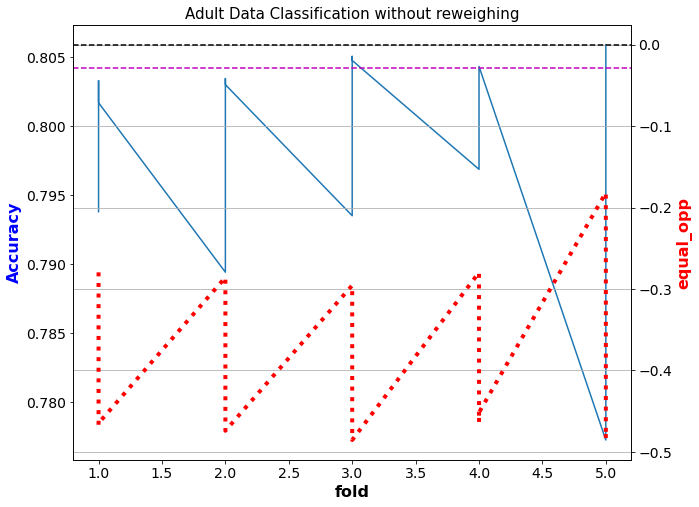

In [11]:
#plotting the results 
fig, ax1= plt.subplots(figsize=(10,8))
ax1.plot(adult_df['K_fold'], adult_df['LR_accuracies'])
ax1.set_xlabel('fold', fontsize=16, fontweight='bold')
ax1.set_ylabel('Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.axhline(y=0.8042039172865625, color='m',linestyle='--') #this is a bench mark accuracy for the classifier trial from the labs
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2= ax1.twinx()
ax2.plot(adult_df['K_fold'], adult_df['LR_fairness'],color='r', linestyle=':',linewidth=4)
ax2.set_ylabel('equal_opp', color='r', fontsize=16, fontweight='bold')
ax2.axhline(y=0,color='k',linestyle='--') #this is a bench mark of the desired equal opportunity difference= 0 
ax2.yaxis.set_tick_params(labelsize=14)
plt.title("Adult Data Classification without reweighing",fontsize=15)
ax2.grid(True);

In [12]:
#getting the results of the parameters combination that yields the best accuracy (Classifier 1)
print(f" Maximum accuracy of model can be found in row {adult_df['LR_accuracies'].idxmax()}\n")
adult_df.iloc[173]

 Maximum accuracy of model can be found in row 173



LR_accuracies    0.805909
LR_fairness     -0.471646
C                     0.1
Solver               saga
penalty                l2
K_fold                  5
Name: 173, dtype: object

In [13]:
#getting the results of the parameters combination that yields the best fairness (Classifier 2)
#equal opportunity is better when it is closer to zero , and the negative value indicates bias towards the privalaged group 
print(f"Best fairness of the model can be found in row {adult_df['LR_fairness'].idxmax()}\n")
adult_df.iloc[160]

Best fairness of the model can be found in row 160



LR_accuracies    0.777241
LR_fairness     -0.181881
C                   0.001
Solver               saga
penalty                l1
K_fold                  5
Name: 160, dtype: object

In [14]:
#Evaluating the LR classifier on the test set for accuracy parameters (classifier 1)
LR_learner_adult_acctest= LogisticRegression(C=0.1,solver="saga",penalty="l2",random_state=0)
LR_learner_adult_acctest.fit(adult_x_train,adult_y_train)
predictions_test=LR_learner_adult_acctest.predict(adult_x_test)
main_test_pred = adult_test.copy()
main_test_pred.labels = predictions_test
main_test_fairness_metric= ClassificationMetric(adult_test,main_test_pred, unprivileged_groups= adult_unprivileged_groups, privileged_groups= adult_privileged_groups)
main_test_acc= sum(predictions_test==adult_y_test)/len(adult_y_test)
main_equal_opp= main_test_fairness_metric.equal_opportunity_difference()
print(f"accuracy on adult testing= {main_test_acc},Fairness of Logistic Regression on the adult test set = {main_equal_opp}")
#so it can be seen that the accuracy value on the validation and testing data is very close, which means the model is performing well accurasy wise.

accuracy on adult testing= 0.8042039172865625,Fairness of Logistic Regression on the adult test set = -0.4414141414141414


In [15]:
#Evaluating the model for fairness on the test data with the best fairness parameters (Classifier 2)
LR_learner_adult_frtest=LogisticRegression(C=0.001,solver="saga",penalty="l1",random_state=0)
LR_learner_adult_frtest.fit(adult_x_train,adult_y_train)
predictions_frtest= LR_learner_adult_frtest.predict(adult_x_test)
main_test_frtest= adult_test.copy()
main_test_frtest.labels= predictions_frtest
fr_test_metric = ClassificationMetric(adult_test, main_test_frtest, unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)
main_test_fracc= sum(predictions_frtest==adult_y_test)/len(adult_y_test)
equal_opp_test= fr_test_metric.equal_opportunity_difference()
print(f"accuracy on adult testing= {main_test_fracc}, Fairness of Logistic Regression on the adult test set = {equal_opp_test}")

#it can be noticed that the model is scoring better fairness on the training-validation data.

accuracy on adult testing= 0.8043404081075548, Fairness of Logistic Regression on the adult test set = -0.45656565656565656


##German DataSet

In [16]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german/

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german


In [17]:
#getting the german data from the UCI website 
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc

--2022-05-13 14:23:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data.1’

german.data.1       100%[===================>]  77.92K  --.-KB/s    in 0.1s    

2022-05-13 14:23:14 (570 KB/s) - ‘german.data.1’ saved [79793/79793]

--2022-05-13 14:23:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4679 (4.6K) [application/x-httpd-php]
Saving to: ‘german.doc.1’

german.doc.1        100%[===================>]   4.57K  --.-KB/s    i

In [18]:
#Loading the data
german_dataset_orig=load_data(data="German") 
german_df=pd.DataFrame(data=german_dataset_orig.features,columns=german_dataset_orig.feature_names)
german_df.head()

,age,sex,credit_history=Delay,credit_history=None/Paid,credit_history=Other,savings=500+,savings=<500,savings=Unknown/None,employment=1-4 years,employment=4+ years,employment=Unemployed
0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [19]:
#splitting the german dataset into training and testing files 
german_train, german_test = german_dataset_orig.split([0.7], shuffle=True)
# print out some labels, names, etc.
print("###Training Dataset shape")
print(german_train.features.shape)
print("#### Favorable and unfavorable labels")
print(german_train.favorable_label, german_train.unfavorable_label)
print("#### Protected attribute names")
print(german_train.protected_attribute_names)
print("#### Privileged and unprivileged protected attribute values")
print(german_train.privileged_protected_attributes,german_train.unprivileged_protected_attributes)
print("#### Dataset feature names")
print(german_train.feature_names)

###Training Dataset shape
(700, 11)
#### Favorable and unfavorable labels
1.0 2.0
#### Protected attribute names
['sex']
#### Privileged and unprivileged protected attribute values
[array([1.])] [array([0.])]
#### Dataset feature names
['age', 'sex', 'credit_history=Delay', 'credit_history=None/Paid', 'credit_history=Other', 'savings=500+', 'savings=<500', 'savings=Unknown/None', 'employment=1-4 years', 'employment=4+ years', 'employment=Unemployed']


In [20]:
#Normalizing the data 
german_x_train = scaler.fit_transform(german_train.features)
german_y_train = german_train.labels.ravel()
german_yt_data_copied = german_train.copy()

german_x_test = scaler.transform(german_test.features) 
german_y_test = german_test.labels.ravel()

In [21]:
#previlaged and unprevilaged groups
german_privileged_groups = [{'sex': 1}]
german_unprivileged_groups = [{'sex': 0}]
#carrying out kfolds cross validatoin on the training data 
G_LR=[0.001,0.1,1,1.5,3,5,10,20] #
solver_LR=['saga', 'liblinear']
penalty_LR=['l1','l2']

german_results=[]

kf_cv= KFold(n_splits=5, random_state=42, shuffle=True) #k_fold cross validation 
for k_fold, (train_idx,test_idx) in enumerate(kf_cv.split(german_x_train,german_y_train)):
  #print("train", train_idx, "test", test_idx)
  x_train_kf, x_test_kf= german_x_train[train_idx], german_x_train[test_idx]
  y_train_kf, y_test_kf = german_y_train[train_idx], german_y_train[test_idx]

  #trying the k_fold with different hyperparameter combinations  on the model 
  for c in G_LR:
    for solver in solver_LR:
      for penalty in penalty_LR:
        print(f"C= {c}, solver= {solver}, penalty= {penalty}, fold= {k_fold+1}")
        LR_learner=LogisticRegression(C=c,solver=solver,penalty=penalty)#Logistic regression classifier 
        LR_learner.fit(x_train_kf,y_train_kf) #fitting the folds 
        predictions= LR_learner.predict(x_test_kf) #predicting the outcome on the test fold 
        test_pred= german_yt_data_copied.subset(test_idx)
        test_pred.labels= predictions
        model_acc = sum(predictions==y_test_kf)/len(y_test_kf)
        fairness_metric= ClassificationMetric(german_yt_data_copied.subset(test_idx),test_pred , unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)#fairness metric
        equal_opp= fairness_metric.equal_opportunity_difference() #equal opportunity fairness metric 
        #c_matrix=fairness_metric.binary_confusion_matrix(privileged=privileged_groups)
        german_results.append((model_acc,equal_opp,c,solver,penalty,k_fold+1))

C= 0.001, solver= saga, penalty= l1, fold= 1
C= 0.001, solver= saga, penalty= l2, fold= 1
C= 0.001, solver= liblinear, penalty= l1, fold= 1
C= 0.001, solver= liblinear, penalty= l2, fold= 1
C= 0.1, solver= saga, penalty= l1, fold= 1
C= 0.1, solver= saga, penalty= l2, fold= 1
C= 0.1, solver= liblinear, penalty= l1, fold= 1
C= 0.1, solver= liblinear, penalty= l2, fold= 1
C= 1, solver= saga, penalty= l1, fold= 1
C= 1, solver= saga, penalty= l2, fold= 1
C= 1, solver= liblinear, penalty= l1, fold= 1
C= 1, solver= liblinear, penalty= l2, fold= 1
C= 1.5, solver= saga, penalty= l1, fold= 1
C= 1.5, solver= saga, penalty= l2, fold= 1
C= 1.5, solver= liblinear, penalty= l1, fold= 1
C= 1.5, solver= liblinear, penalty= l2, fold= 1
C= 3, solver= saga, penalty= l1, fold= 1
C= 3, solver= saga, penalty= l2, fold= 1
C= 3, solver= liblinear, penalty= l1, fold= 1
C= 3, solver= liblinear, penalty= l2, fold= 1
C= 5, solver= saga, penalty= l1, fold= 1
C= 5, solver= saga, penalty= l2, fold= 1
C= 5, solver= li

The max_iter was reached which means the coef_ did not converge


C= 3, solver= liblinear, penalty= l2, fold= 2
C= 5, solver= saga, penalty= l1, fold= 2
C= 5, solver= saga, penalty= l2, fold= 2
C= 5, solver= liblinear, penalty= l1, fold= 2
C= 5, solver= liblinear, penalty= l2, fold= 2
C= 10, solver= saga, penalty= l1, fold= 2
C= 10, solver= saga, penalty= l2, fold= 2
C= 10, solver= liblinear, penalty= l1, fold= 2
C= 10, solver= liblinear, penalty= l2, fold= 2
C= 20, solver= saga, penalty= l1, fold= 2
C= 20, solver= saga, penalty= l2, fold= 2
C= 20, solver= liblinear, penalty= l1, fold= 2
C= 20, solver= liblinear, penalty= l2, fold= 2
C= 0.001, solver= saga, penalty= l1, fold= 3
C= 0.001, solver= saga, penalty= l2, fold= 3
C= 0.001, solver= liblinear, penalty= l1, fold= 3
C= 0.001, solver= liblinear, penalty= l2, fold= 3
C= 0.1, solver= saga, penalty= l1, fold= 3
C= 0.1, solver= saga, penalty= l2, fold= 3
C= 0.1, solver= liblinear, penalty= l1, fold= 3
C= 0.1, solver= liblinear, penalty= l2, fold= 3
C= 1, solver= saga, penalty= l1, fold= 3
C= 1, solve

The max_iter was reached which means the coef_ did not converge


C= 5, solver= liblinear, penalty= l2, fold= 3
C= 10, solver= saga, penalty= l1, fold= 3
C= 10, solver= saga, penalty= l2, fold= 3
C= 10, solver= liblinear, penalty= l1, fold= 3
C= 10, solver= liblinear, penalty= l2, fold= 3
C= 20, solver= saga, penalty= l1, fold= 3
C= 20, solver= saga, penalty= l2, fold= 3
C= 20, solver= liblinear, penalty= l1, fold= 3
C= 20, solver= liblinear, penalty= l2, fold= 3
C= 0.001, solver= saga, penalty= l1, fold= 4
C= 0.001, solver= saga, penalty= l2, fold= 4
C= 0.001, solver= liblinear, penalty= l1, fold= 4
C= 0.001, solver= liblinear, penalty= l2, fold= 4
C= 0.1, solver= saga, penalty= l1, fold= 4
C= 0.1, solver= saga, penalty= l2, fold= 4
C= 0.1, solver= liblinear, penalty= l1, fold= 4
C= 0.1, solver= liblinear, penalty= l2, fold= 4
C= 1, solver= saga, penalty= l1, fold= 4
C= 1, solver= saga, penalty= l2, fold= 4
C= 1, solver= liblinear, penalty= l1, fold= 4
C= 1, solver= liblinear, penalty= l2, fold= 4
C= 1.5, solver= saga, penalty= l1, fold= 4


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 1.5, solver= saga, penalty= l2, fold= 4
C= 1.5, solver= liblinear, penalty= l1, fold= 4
C= 1.5, solver= liblinear, penalty= l2, fold= 4
C= 3, solver= saga, penalty= l1, fold= 4
C= 3, solver= saga, penalty= l2, fold= 4
C= 3, solver= liblinear, penalty= l1, fold= 4
C= 3, solver= liblinear, penalty= l2, fold= 4
C= 5, solver= saga, penalty= l1, fold= 4
C= 5, solver= saga, penalty= l2, fold= 4
C= 5, solver= liblinear, penalty= l1, fold= 4
C= 5, solver= liblinear, penalty= l2, fold= 4
C= 10, solver= saga, penalty= l1, fold= 4
C= 10, solver= saga, penalty= l2, fold= 4
C= 10, solver= liblinear, penalty= l1, fold= 4
C= 10, solver= liblinear, penalty= l2, fold= 4
C= 20, solver= saga, penalty= l1, fold= 4
C= 20, solver= saga, penalty= l2, fold= 4
C= 20, solver= liblinear, penalty= l1, fold= 4
C= 20, solver= liblinear, penalty= l2, fold= 4
C= 0.001, solver= saga, penalty= l1, fold= 5
C= 0.001, solver= saga, penalty= l2, fold= 5
C= 0.001, solver= liblinear, penalty= l1, fold= 5
C= 0.001, solver=

The max_iter was reached which means the coef_ did not converge


C= 1.5, solver= liblinear, penalty= l1, fold= 5
C= 1.5, solver= liblinear, penalty= l2, fold= 5
C= 3, solver= saga, penalty= l1, fold= 5
C= 3, solver= saga, penalty= l2, fold= 5
C= 3, solver= liblinear, penalty= l1, fold= 5
C= 3, solver= liblinear, penalty= l2, fold= 5
C= 5, solver= saga, penalty= l1, fold= 5
C= 5, solver= saga, penalty= l2, fold= 5
C= 5, solver= liblinear, penalty= l1, fold= 5
C= 5, solver= liblinear, penalty= l2, fold= 5
C= 10, solver= saga, penalty= l1, fold= 5
C= 10, solver= saga, penalty= l2, fold= 5
C= 10, solver= liblinear, penalty= l1, fold= 5
C= 10, solver= liblinear, penalty= l2, fold= 5
C= 20, solver= saga, penalty= l1, fold= 5
C= 20, solver= saga, penalty= l2, fold= 5
C= 20, solver= liblinear, penalty= l1, fold= 5
C= 20, solver= liblinear, penalty= l2, fold= 5


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


In [22]:
#putting the classifier's results on german data into a pandas df 
german_df=pd.DataFrame(data=german_results,columns=["LR_accuracies","LR_fairness","C","Solver","penalty","K_fold"])
german_df.head()

,LR_accuracies,LR_fairness,C,Solver,penalty,K_fold
0,0.678571,0.000000,0.001,saga,l1,1
1,0.678571,0.000000,0.001,saga,l2,1
2,0.678571,0.000000,0.001,liblinear,l1,1
3,0.692857,-0.123077,0.001,liblinear,l2,1
4,0.678571,0.000000,0.100,saga,l1,1


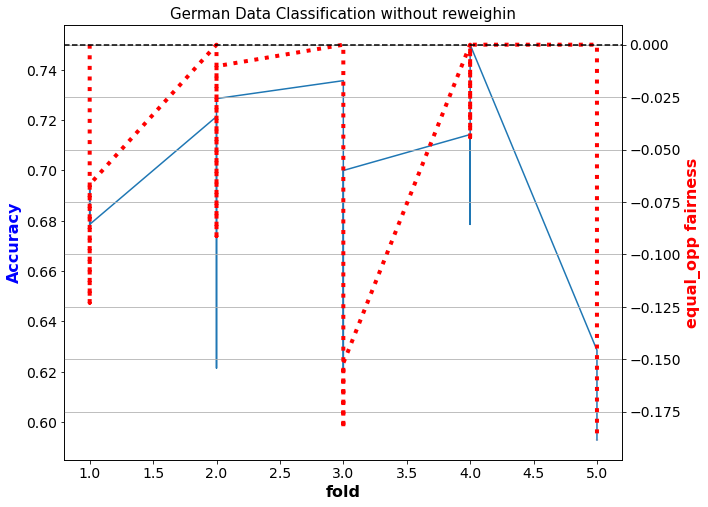

In [23]:
fig, ax1= plt.subplots(figsize=(10,8))
ax1.plot(german_df['K_fold'], german_df['LR_accuracies'])
ax1.set_xlabel('fold', fontsize=16, fontweight='bold')
ax1.set_ylabel('Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2= ax1.twinx()
ax2.plot(german_df['K_fold'], german_df['LR_fairness'],color='r', linestyle=':',linewidth=4)
ax2.set_ylabel('equal_opp fairness', color='r', fontsize=16, fontweight='bold')
ax2.axhline(y=0,color='k',linestyle='--')
ax2.yaxis.set_tick_params(labelsize=14)
plt.title("German Data Classification without reweighin", fontsize= 15)
ax2.grid(True);

In [24]:
#so it can be noticed that the LR classifier is scoring 24 zeros on the equal opp fairness metric for the cross validation data, this will be invistigated
best_fairness= german_df.loc[german_df['LR_fairness']==0]
best_fairness

,LR_accuracies,LR_fairness,C,Solver,penalty,K_fold
0,0.678571,0.0,0.001,saga,l1,1
1,0.678571,0.0,0.001,saga,l2,1
2,0.678571,0.0,0.001,liblinear,l1,1
4,0.678571,0.0,0.100,saga,l1,1
6,0.678571,0.0,0.100,liblinear,l1,1
32,0.721429,0.0,0.001,saga,l1,2
33,0.721429,0.0,0.001,saga,l2,2
34,0.721429,0.0,0.001,liblinear,l1,2
36,0.721429,0.0,0.100,saga,l1,2
64,0.735714,0.0,0.001,saga,l1,3


In [25]:
#getting the results of the parameters combination that yields the best accuracy (Classifier 3)
print(f" Maximum accuracy of model can be found in row {german_df['LR_accuracies'].idxmax()}\n")
german_df.iloc[101]

 Maximum accuracy of model can be found in row 101



LR_accuracies    0.75
LR_fairness       0.0
C                 0.1
Solver           saga
penalty            l2
K_fold              4
Name: 101, dtype: object

In [26]:
#getting the results of the parameters' combinations that yields the best fairness (Classifier 4)
print(f"Best fairness of the model can be found in row {german_df['LR_fairness'].idxmax()}\n") 
german_df.iloc[0]

Best fairness of the model can be found in row 0



LR_accuracies    0.678571
LR_fairness           0.0
C                   0.001
Solver               saga
penalty                l1
K_fold                  1
Name: 0, dtype: object

In [27]:
#evaluating the classifier's accuracy on the german test data (Classifier 3)
LR_learner_german_acctest= LogisticRegression(C=0.1,solver="saga",penalty="l2",random_state=0)
LR_learner_adult_acctest.fit(german_x_train,german_y_train)
predictions_test=LR_learner_adult_acctest.predict(german_x_test)
german_main_test_pred = german_test.copy()
german_main_test_pred.labels = predictions_test
german_main_fairness_metric= ClassificationMetric(german_test,german_main_test_pred, unprivileged_groups= german_unprivileged_groups, privileged_groups= german_privileged_groups)
german_main_test_acc= sum(predictions_test==german_y_test)/len(german_y_test)
equal_opp= german_main_fairness_metric.equal_opportunity_difference()
print(f"Accuracy of Logistic Regression on german testing data = {german_main_test_acc}, Fairness of Logistic Regression on german dataset= {equal_opp}")

Accuracy of Logistic Regression on german testing data = 0.7166666666666667, Fairness of Logistic Regression on german dataset= -0.05888697152717859


In [28]:
#Evaluating the classifier's fairness on the german test data (Classifier 4)
LR_learner_german_frtest=LogisticRegression(C=0.1,solver="saga",penalty="l2",random_state=0)
LR_learner_german_frtest.fit(german_x_train,german_y_train)
predictions_frtest= LR_learner_german_frtest.predict(german_x_test)
german_main_test_frtest= german_test.copy()
german_main_test_frtest.labels= predictions_frtest
german_fr_test_metric = ClassificationMetric(german_test, german_main_test_frtest, unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)
german_equal_opp_test= german_fr_test_metric.equal_opportunity_difference()
german_test_fr_acc= sum(predictions_frtest==german_y_test)/len(german_y_test)
print(f"Accuracy of Logistic Regression on german testing data = {german_test_fr_acc},Fairness of Logistic Regression on the german test set = {german_equal_opp_test}")

#as it can be seen the classifier is showing a minor value of bias towards the privelaged group on the testing data.

Accuracy of Logistic Regression on german testing data = 0.7166666666666667,Fairness of Logistic Regression on the german test set = -0.05888697152717859


#Task 2

##Adult Dataset

In [29]:
#Now we are going to use a fairness method to see how our model will perfrom on accuracy and fairness 
#We will be using reweighing as a fairness method
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric 
metric_orig_train = BinaryLabelDatasetMetric(adult_train,unprivileged_groups=adult_unprivileged_groups,
                                             privileged_groups=adult_privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.193075


In [30]:
#Applying reweighing to the training data
RW = Reweighing(unprivileged_groups=adult_unprivileged_groups,
               privileged_groups=adult_privileged_groups)
RW.fit(adult_train)
adult_train_transf=  RW.transform(adult_train)

In [31]:
np.unique(adult_train_transf.instance_weights)

array([0.78875735, 0.85514075, 1.09270553, 2.1493453 ])

In [32]:
metric_transf_train = BinaryLabelDatasetMetric(adult_train_transf, 
                                         unprivileged_groups=adult_unprivileged_groups,
                                         privileged_groups=adult_privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


In [33]:
#carrying out kfolds cross validatoin on the training data 
C_LR=[0.001,0.005,0.01,0.1,1,10,20,100,200,1000] #
solver_LR=['saga', 'liblinear']
penalty_LR=['l1','l2']

adult_results_transf= []

kf_cv= KFold(n_splits=5, random_state=42, shuffle=True) #k_fold cross validation 
for k_fold, (train_idx,test_idx) in enumerate(kf_cv.split(adult_x_train,adult_y_train)):
  #print("train", train_idx, "test", test_idx)
  x_train_kf, x_test_kf= adult_x_train[train_idx], adult_x_train[test_idx]
  y_train_kf, y_test_kf = adult_y_train[train_idx], adult_y_train[test_idx]

  #trying the k_fold with different hyperparameter combinations  on the model 
  for c in C_LR:
    for solver in solver_LR:
      for penalty in penalty_LR:
        print(f"C= {c}, solver= {solver}, penalty= {penalty}, fold= {k_fold+1}")
        LR_learner=LogisticRegression(C=c,solver=solver,penalty=penalty)#Logistic regression classifier 
        LR_learner.fit(x_train_kf,y_train_kf,sample_weight=adult_train_transf.instance_weights[train_idx]) #fitting the folds 
        predictions= LR_learner.predict(x_test_kf) #predicting the outcome on the test fold 
        model_acc = sum(predictions==y_test_kf)/len(y_test_kf)
        test_pred= yt_data_copied.subset(test_idx)
        #predictions.resize((len(predictions),1))
        test_pred.labels= predictions
        fairness_metric= ClassificationMetric(yt_data_copied.subset(test_idx),test_pred , unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)#fairness metric
        equal_opp= fairness_metric.equal_opportunity_difference() #equal opportunity fairness metric 
        #c_matrix=fairness_metric.binary_confusion_matrix(privileged=privileged_groups)
        adult_results_transf.append((model_acc,equal_opp,c,solver,penalty,k_fold+1))

C= 0.001, solver= saga, penalty= l1, fold= 1
C= 0.001, solver= saga, penalty= l2, fold= 1
C= 0.001, solver= liblinear, penalty= l1, fold= 1
C= 0.001, solver= liblinear, penalty= l2, fold= 1
C= 0.005, solver= saga, penalty= l1, fold= 1
C= 0.005, solver= saga, penalty= l2, fold= 1
C= 0.005, solver= liblinear, penalty= l1, fold= 1
C= 0.005, solver= liblinear, penalty= l2, fold= 1
C= 0.01, solver= saga, penalty= l1, fold= 1
C= 0.01, solver= saga, penalty= l2, fold= 1
C= 0.01, solver= liblinear, penalty= l1, fold= 1
C= 0.01, solver= liblinear, penalty= l2, fold= 1
C= 0.1, solver= saga, penalty= l1, fold= 1
C= 0.1, solver= saga, penalty= l2, fold= 1
C= 0.1, solver= liblinear, penalty= l1, fold= 1
C= 0.1, solver= liblinear, penalty= l2, fold= 1
C= 1, solver= saga, penalty= l1, fold= 1
C= 1, solver= saga, penalty= l2, fold= 1
C= 1, solver= liblinear, penalty= l1, fold= 1
C= 1, solver= liblinear, penalty= l2, fold= 1
C= 10, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 1
C= 10, solver= liblinear, penalty= l1, fold= 1
C= 10, solver= liblinear, penalty= l2, fold= 1
C= 20, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 1
C= 20, solver= liblinear, penalty= l1, fold= 1
C= 20, solver= liblinear, penalty= l2, fold= 1
C= 100, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge


C= 100, solver= saga, penalty= l2, fold= 1
C= 100, solver= liblinear, penalty= l1, fold= 1
C= 100, solver= liblinear, penalty= l2, fold= 1
C= 200, solver= saga, penalty= l1, fold= 1
C= 200, solver= saga, penalty= l2, fold= 1
C= 200, solver= liblinear, penalty= l1, fold= 1
C= 200, solver= liblinear, penalty= l2, fold= 1
C= 1000, solver= saga, penalty= l1, fold= 1
C= 1000, solver= saga, penalty= l2, fold= 1
C= 1000, solver= liblinear, penalty= l1, fold= 1
C= 1000, solver= liblinear, penalty= l2, fold= 1
C= 0.001, solver= saga, penalty= l1, fold= 2
C= 0.001, solver= saga, penalty= l2, fold= 2
C= 0.001, solver= liblinear, penalty= l1, fold= 2
C= 0.001, solver= liblinear, penalty= l2, fold= 2
C= 0.005, solver= saga, penalty= l1, fold= 2
C= 0.005, solver= saga, penalty= l2, fold= 2
C= 0.005, solver= liblinear, penalty= l1, fold= 2
C= 0.005, solver= liblinear, penalty= l2, fold= 2
C= 0.01, solver= saga, penalty= l1, fold= 2
C= 0.01, solver= saga, penalty= l2, fold= 2
C= 0.01, solver= liblinea

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 2
C= 10, solver= liblinear, penalty= l1, fold= 2
C= 10, solver= liblinear, penalty= l2, fold= 2
C= 20, solver= saga, penalty= l1, fold= 2


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 2
C= 20, solver= liblinear, penalty= l1, fold= 2
C= 20, solver= liblinear, penalty= l2, fold= 2
C= 100, solver= saga, penalty= l1, fold= 2


The max_iter was reached which means the coef_ did not converge


C= 100, solver= saga, penalty= l2, fold= 2
C= 100, solver= liblinear, penalty= l1, fold= 2
C= 100, solver= liblinear, penalty= l2, fold= 2
C= 200, solver= saga, penalty= l1, fold= 2
C= 200, solver= saga, penalty= l2, fold= 2
C= 200, solver= liblinear, penalty= l1, fold= 2
C= 200, solver= liblinear, penalty= l2, fold= 2
C= 1000, solver= saga, penalty= l1, fold= 2
C= 1000, solver= saga, penalty= l2, fold= 2
C= 1000, solver= liblinear, penalty= l1, fold= 2
C= 1000, solver= liblinear, penalty= l2, fold= 2
C= 0.001, solver= saga, penalty= l1, fold= 3
C= 0.001, solver= saga, penalty= l2, fold= 3
C= 0.001, solver= liblinear, penalty= l1, fold= 3
C= 0.001, solver= liblinear, penalty= l2, fold= 3
C= 0.005, solver= saga, penalty= l1, fold= 3
C= 0.005, solver= saga, penalty= l2, fold= 3
C= 0.005, solver= liblinear, penalty= l1, fold= 3
C= 0.005, solver= liblinear, penalty= l2, fold= 3
C= 0.01, solver= saga, penalty= l1, fold= 3
C= 0.01, solver= saga, penalty= l2, fold= 3
C= 0.01, solver= liblinea

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 3
C= 10, solver= liblinear, penalty= l1, fold= 3
C= 10, solver= liblinear, penalty= l2, fold= 3
C= 20, solver= saga, penalty= l1, fold= 3


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 3
C= 20, solver= liblinear, penalty= l1, fold= 3
C= 20, solver= liblinear, penalty= l2, fold= 3
C= 100, solver= saga, penalty= l1, fold= 3
C= 100, solver= saga, penalty= l2, fold= 3
C= 100, solver= liblinear, penalty= l1, fold= 3
C= 100, solver= liblinear, penalty= l2, fold= 3
C= 200, solver= saga, penalty= l1, fold= 3
C= 200, solver= saga, penalty= l2, fold= 3
C= 200, solver= liblinear, penalty= l1, fold= 3
C= 200, solver= liblinear, penalty= l2, fold= 3
C= 1000, solver= saga, penalty= l1, fold= 3
C= 1000, solver= saga, penalty= l2, fold= 3
C= 1000, solver= liblinear, penalty= l1, fold= 3
C= 1000, solver= liblinear, penalty= l2, fold= 3
C= 0.001, solver= saga, penalty= l1, fold= 4
C= 0.001, solver= saga, penalty= l2, fold= 4
C= 0.001, solver= liblinear, penalty= l1, fold= 4
C= 0.001, solver= liblinear, penalty= l2, fold= 4
C= 0.005, solver= saga, penalty= l1, fold= 4
C= 0.005, solver= saga, penalty= l2, fold= 4
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 4
C= 10, solver= liblinear, penalty= l1, fold= 4
C= 10, solver= liblinear, penalty= l2, fold= 4
C= 20, solver= saga, penalty= l1, fold= 4


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 4
C= 20, solver= liblinear, penalty= l1, fold= 4
C= 20, solver= liblinear, penalty= l2, fold= 4
C= 100, solver= saga, penalty= l1, fold= 4
C= 100, solver= saga, penalty= l2, fold= 4
C= 100, solver= liblinear, penalty= l1, fold= 4
C= 100, solver= liblinear, penalty= l2, fold= 4
C= 200, solver= saga, penalty= l1, fold= 4
C= 200, solver= saga, penalty= l2, fold= 4
C= 200, solver= liblinear, penalty= l1, fold= 4
C= 200, solver= liblinear, penalty= l2, fold= 4
C= 1000, solver= saga, penalty= l1, fold= 4
C= 1000, solver= saga, penalty= l2, fold= 4
C= 1000, solver= liblinear, penalty= l1, fold= 4
C= 1000, solver= liblinear, penalty= l2, fold= 4
C= 0.001, solver= saga, penalty= l1, fold= 5
C= 0.001, solver= saga, penalty= l2, fold= 5
C= 0.001, solver= liblinear, penalty= l1, fold= 5
C= 0.001, solver= liblinear, penalty= l2, fold= 5
C= 0.005, solver= saga, penalty= l1, fold= 5
C= 0.005, solver= saga, penalty= l2, fold= 5
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 5
C= 10, solver= liblinear, penalty= l1, fold= 5
C= 10, solver= liblinear, penalty= l2, fold= 5
C= 20, solver= saga, penalty= l1, fold= 5


The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 5
C= 20, solver= liblinear, penalty= l1, fold= 5
C= 20, solver= liblinear, penalty= l2, fold= 5
C= 100, solver= saga, penalty= l1, fold= 5
C= 100, solver= saga, penalty= l2, fold= 5
C= 100, solver= liblinear, penalty= l1, fold= 5
C= 100, solver= liblinear, penalty= l2, fold= 5
C= 200, solver= saga, penalty= l1, fold= 5
C= 200, solver= saga, penalty= l2, fold= 5
C= 200, solver= liblinear, penalty= l1, fold= 5
C= 200, solver= liblinear, penalty= l2, fold= 5
C= 1000, solver= saga, penalty= l1, fold= 5
C= 1000, solver= saga, penalty= l2, fold= 5
C= 1000, solver= liblinear, penalty= l1, fold= 5
C= 1000, solver= liblinear, penalty= l2, fold= 5


In [34]:
adult_df_transf=pd.DataFrame(data=adult_results_transf,columns=["LR_accuracies","LR_fairness","C","Solver","penalty","K_fold"])
adult_df_transf.head()

,LR_accuracies,LR_fairness,C,Solver,penalty,K_fold
0,0.758555,0.000000,0.001,saga,l1,1
1,0.783124,-0.044425,0.001,saga,l2,1
2,0.783709,-0.023433,0.001,liblinear,l1,1
3,0.786195,0.006962,0.001,liblinear,l2,1
4,0.786195,0.006962,0.005,saga,l1,1


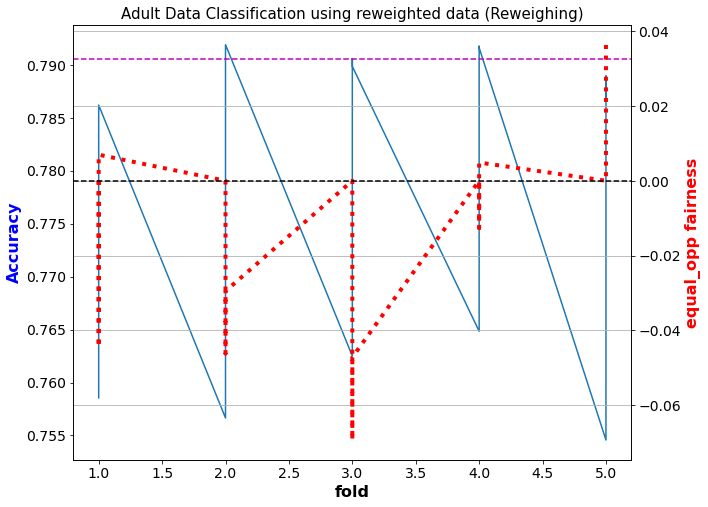

In [35]:
#plotting the results
fig, ax1= plt.subplots(figsize=(10,8))
ax1.plot(adult_df_transf['K_fold'], adult_df_transf['LR_accuracies'])
ax1.set_xlabel('fold', fontsize=16, fontweight='bold')
ax1.set_ylabel('Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.axhline(y=0.7905548351873336, color='m', linestyle='--') #this is the accuracy bench mark of the classifier used in the labs with reweighing
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2= ax1.twinx()
ax2.plot(adult_df_transf['K_fold'], adult_df_transf['LR_fairness'],color='r', linestyle=':',linewidth=4)
ax2.set_ylabel('equal_opp fairness', color='r', fontsize=16, fontweight='bold')
ax2.axhline(y=0,color='k',linestyle='--') # this is the equal opportunity difference bench mark= 0 
ax2.yaxis.set_tick_params(labelsize=14)
plt.title("Adult Data Classification using reweighted data (Reweighing)", fontsize= 15)
ax2.grid(True);

In [36]:
#maximum accuracy achieved
print(f" Maximum accuracy of model can be found in row {adult_df_transf['LR_accuracies'].idxmax()}\n")
adult_df_transf.iloc[43]

 Maximum accuracy of model can be found in row 43



LR_accuracies     0.791898
LR_fairness      -0.029498
C                    0.001
Solver           liblinear
penalty                 l2
K_fold                   2
Name: 43, dtype: object

In [37]:
#models that yielded eq opp fairness =0 which is the best fairness 
best_fairness=adult_df_transf.loc[adult_df_transf['LR_fairness']==0]
best_fairness

,LR_accuracies,LR_fairness,C,Solver,penalty,K_fold
0,0.758555,0.0,0.001,saga,l1,1
40,0.756654,0.0,0.001,saga,l1,2
80,0.762504,0.0,0.001,saga,l1,3
120,0.764844,0.0,0.001,saga,l1,4
160,0.754571,0.0,0.001,saga,l1,5


In [38]:
#Evaluating the LR classifier on the test set for accuracy parameters after reweighing is done (classifier 5)
LR_learner_adult_test_accrw= LogisticRegression(C=0.001,solver="liblinear",penalty="l2",random_state=0)
LR_learner_adult_test_accrw.fit(adult_x_train,adult_y_train, sample_weight=adult_train_transf.instance_weights)
predictions_test_accrw=LR_learner_adult_test_accrw.predict(adult_x_test)
main_test_pred_accrw= adult_test.copy()
main_test_pred_accrw.labels= predictions_test_accrw
acc_test_metric_rw= ClassificationMetric(adult_test, main_test_pred_accrw, unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)
equal_opp_test_accrw= acc_test_metric_rw.equal_opportunity_difference()
print(f"Accuracy of Logistic Regression on adult  reweighted testing data = {sum(predictions_test_accrw==adult_y_test)/len(adult_y_test)}, fairness of adult reweighted= {equal_opp_test_accrw}")

#it can be noticed that the testing accuracy is close to the cross validation accuracy, so model is perfroming well accuracy wise

Accuracy of Logistic Regression on adult  reweighted testing data = 0.7905548351873336, fairness of adult reweighted= 0.03513180586351322


In [39]:
#Evaluating the LR classifier on the test set for fairness parameters after reweighing is done (classifier 6)
LR_learner_adult_test_frw = LogisticRegression(C=00.1, solver='saga', penalty='l1', random_state=0)
LR_learner_adult_test_frw.fit(adult_x_train,adult_y_train, sample_weight= adult_train_transf.instance_weights)
predictions_test_frw = LR_learner_adult_test_frw.predict(adult_x_test)
main_test_pred_frw = adult_test.copy()
main_test_pred_frw.labels = predictions_test_frw
fr_test_metric_rw = ClassificationMetric(adult_test, main_test_pred_frw, unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)
equal_opp_test_rw = fr_test_metric_rw.equal_opportunity_difference()
print(f"accuracy of LR with fairness parameters={sum(predictions_test_frw==adult_y_test)/len(adult_y_test)},Fairness of Logistic Regression on the adult test set using reweighing = {equal_opp_test_rw}")

#it can be seen that the fairness on the test set is smaller when using reweighing 

accuracy of LR with fairness parameters=0.7905548351873336,Fairness of Logistic Regression on the adult test set using reweighing = 0.03513180586351322


##German Dataset

In [40]:
#difference in mean outcome between unprivilaged and privalaged before reweighing
german_metric_orig_train = BinaryLabelDatasetMetric(german_train,unprivileged_groups=german_unprivileged_groups,
                                             privileged_groups=german_privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % german_metric_orig_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.068794


In [41]:
#Applying reweighing to the German dataset
german_RW = Reweighing(unprivileged_groups=german_unprivileged_groups,
               privileged_groups=german_privileged_groups)
RW.fit(german_train)
german_train_transf=  RW.transform(german_train)

In [42]:
np.unique(german_train_transf.instance_weights)

array([0.86481203, 0.97039111, 1.07338776, 1.07499479])

In [43]:
#difference in mean outcome between unprivilaged and privalaged after reweighing
german_metric_transf_train = BinaryLabelDatasetMetric(german_train_transf, 
                                         unprivileged_groups=german_unprivileged_groups,
                                         privileged_groups=german_privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % german_metric_transf_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = 0.000000


In [44]:
#carrying out kfolds cross validatoin on the training data 
G_LR=[0.001,0.1,1,1.5,3,5,10,20] #
solver_LR=['saga', 'liblinear']
penalty_LR=['l1','l2']

german_results_transf=[]

kf_cv= KFold(n_splits=5, random_state=42, shuffle=True) #k_fold cross validation 
for k_fold, (train_idx,test_idx) in enumerate(kf_cv.split(german_x_train,german_y_train)):
  #print("train", train_idx, "test", test_idx)
  x_train_kf, x_test_kf= german_x_train[train_idx], german_x_train[test_idx]
  y_train_kf, y_test_kf = german_y_train[train_idx], german_y_train[test_idx]

  #trying the k_fold with different hyperparameter combinations  on the model 
  for c in G_LR:
    for solver in solver_LR:
      for penalty in penalty_LR:
        print(f"C= {c}, solver= {solver}, penalty= {penalty}, fold= {k_fold+1}")
        LR_learner=LogisticRegression(C=c,solver=solver,penalty=penalty)#Logistic regression classifier with reweighted weights 
        LR_learner.fit(x_train_kf,y_train_kf,sample_weight= german_train_transf.instance_weights[train_idx]) #fitting the folds 
        predictions= LR_learner.predict(x_test_kf) #predicting the outcome on the test fold 
        model_acc = sum(predictions==y_test_kf)/len(y_test_kf)
        test_pred= german_yt_data_copied.subset(test_idx)
        test_pred.labels= predictions
        fairness_metric= ClassificationMetric(german_yt_data_copied.subset(test_idx),test_pred , unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)#fairness metric
        equal_opp= fairness_metric.equal_opportunity_difference() #equal opportunity fairness metric 
        #c_matrix=fairness_metric.binary_confusion_matrix(privileged=privileged_groups)
        german_results_transf.append((model_acc,equal_opp,c,solver,penalty,k_fold+1))

C= 0.001, solver= saga, penalty= l1, fold= 1
C= 0.001, solver= saga, penalty= l2, fold= 1
C= 0.001, solver= liblinear, penalty= l1, fold= 1
C= 0.001, solver= liblinear, penalty= l2, fold= 1
C= 0.1, solver= saga, penalty= l1, fold= 1
C= 0.1, solver= saga, penalty= l2, fold= 1
C= 0.1, solver= liblinear, penalty= l1, fold= 1
C= 0.1, solver= liblinear, penalty= l2, fold= 1
C= 1, solver= saga, penalty= l1, fold= 1
C= 1, solver= saga, penalty= l2, fold= 1
C= 1, solver= liblinear, penalty= l1, fold= 1
C= 1, solver= liblinear, penalty= l2, fold= 1
C= 1.5, solver= saga, penalty= l1, fold= 1
C= 1.5, solver= saga, penalty= l2, fold= 1
C= 1.5, solver= liblinear, penalty= l1, fold= 1
C= 1.5, solver= liblinear, penalty= l2, fold= 1
C= 3, solver= saga, penalty= l1, fold= 1
C= 3, solver= saga, penalty= l2, fold= 1
C= 3, solver= liblinear, penalty= l1, fold= 1
C= 3, solver= liblinear, penalty= l2, fold= 1
C= 5, solver= saga, penalty= l1, fold= 1
C= 5, solver= saga, penalty= l2, fold= 1
C= 5, solver= li

The max_iter was reached which means the coef_ did not converge


C= 3, solver= liblinear, penalty= l2, fold= 2
C= 5, solver= saga, penalty= l1, fold= 2
C= 5, solver= saga, penalty= l2, fold= 2
C= 5, solver= liblinear, penalty= l1, fold= 2
C= 5, solver= liblinear, penalty= l2, fold= 2
C= 10, solver= saga, penalty= l1, fold= 2
C= 10, solver= saga, penalty= l2, fold= 2
C= 10, solver= liblinear, penalty= l1, fold= 2
C= 10, solver= liblinear, penalty= l2, fold= 2
C= 20, solver= saga, penalty= l1, fold= 2
C= 20, solver= saga, penalty= l2, fold= 2
C= 20, solver= liblinear, penalty= l1, fold= 2
C= 20, solver= liblinear, penalty= l2, fold= 2
C= 0.001, solver= saga, penalty= l1, fold= 3
C= 0.001, solver= saga, penalty= l2, fold= 3
C= 0.001, solver= liblinear, penalty= l1, fold= 3
C= 0.001, solver= liblinear, penalty= l2, fold= 3
C= 0.1, solver= saga, penalty= l1, fold= 3
C= 0.1, solver= saga, penalty= l2, fold= 3
C= 0.1, solver= liblinear, penalty= l1, fold= 3
C= 0.1, solver= liblinear, penalty= l2, fold= 3
C= 1, solver= saga, penalty= l1, fold= 3
C= 1, solve

The max_iter was reached which means the coef_ did not converge


C= 1.5, solver= saga, penalty= l2, fold= 3
C= 1.5, solver= liblinear, penalty= l1, fold= 3
C= 1.5, solver= liblinear, penalty= l2, fold= 3
C= 3, solver= saga, penalty= l1, fold= 3
C= 3, solver= saga, penalty= l2, fold= 3
C= 3, solver= liblinear, penalty= l1, fold= 3
C= 3, solver= liblinear, penalty= l2, fold= 3
C= 5, solver= saga, penalty= l1, fold= 3
C= 5, solver= saga, penalty= l2, fold= 3
C= 5, solver= liblinear, penalty= l1, fold= 3
C= 5, solver= liblinear, penalty= l2, fold= 3
C= 10, solver= saga, penalty= l1, fold= 3
C= 10, solver= saga, penalty= l2, fold= 3
C= 10, solver= liblinear, penalty= l1, fold= 3
C= 10, solver= liblinear, penalty= l2, fold= 3
C= 20, solver= saga, penalty= l1, fold= 3
C= 20, solver= saga, penalty= l2, fold= 3
C= 20, solver= liblinear, penalty= l1, fold= 3
C= 20, solver= liblinear, penalty= l2, fold= 3


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 0.001, solver= saga, penalty= l1, fold= 4
C= 0.001, solver= saga, penalty= l2, fold= 4
C= 0.001, solver= liblinear, penalty= l1, fold= 4
C= 0.001, solver= liblinear, penalty= l2, fold= 4
C= 0.1, solver= saga, penalty= l1, fold= 4
C= 0.1, solver= saga, penalty= l2, fold= 4
C= 0.1, solver= liblinear, penalty= l1, fold= 4
C= 0.1, solver= liblinear, penalty= l2, fold= 4
C= 1, solver= saga, penalty= l1, fold= 4
C= 1, solver= saga, penalty= l2, fold= 4
C= 1, solver= liblinear, penalty= l1, fold= 4
C= 1, solver= liblinear, penalty= l2, fold= 4
C= 1.5, solver= saga, penalty= l1, fold= 4
C= 1.5, solver= saga, penalty= l2, fold= 4
C= 1.5, solver= liblinear, penalty= l1, fold= 4
C= 1.5, solver= liblinear, penalty= l2, fold= 4
C= 3, solver= saga, penalty= l1, fold= 4
C= 3, solver= saga, penalty= l2, fold= 4
C= 3, solver= liblinear, penalty= l1, fold= 4
C= 3, solver= liblinear, penalty= l2, fold= 4
C= 5, solver= saga, penalty= l1, fold= 4
C= 5, solver= saga, penalty= l2, fold= 4
C= 5, solver= li

The max_iter was reached which means the coef_ did not converge


C= 0.001, solver= saga, penalty= l1, fold= 5
C= 0.001, solver= saga, penalty= l2, fold= 5
C= 0.001, solver= liblinear, penalty= l1, fold= 5
C= 0.001, solver= liblinear, penalty= l2, fold= 5
C= 0.1, solver= saga, penalty= l1, fold= 5
C= 0.1, solver= saga, penalty= l2, fold= 5
C= 0.1, solver= liblinear, penalty= l1, fold= 5
C= 0.1, solver= liblinear, penalty= l2, fold= 5
C= 1, solver= saga, penalty= l1, fold= 5
C= 1, solver= saga, penalty= l2, fold= 5
C= 1, solver= liblinear, penalty= l1, fold= 5
C= 1, solver= liblinear, penalty= l2, fold= 5
C= 1.5, solver= saga, penalty= l1, fold= 5
C= 1.5, solver= saga, penalty= l2, fold= 5
C= 1.5, solver= liblinear, penalty= l1, fold= 5
C= 1.5, solver= liblinear, penalty= l2, fold= 5
C= 3, solver= saga, penalty= l1, fold= 5
C= 3, solver= saga, penalty= l2, fold= 5
C= 3, solver= liblinear, penalty= l1, fold= 5
C= 3, solver= liblinear, penalty= l2, fold= 5
C= 5, solver= saga, penalty= l1, fold= 5
C= 5, solver= saga, penalty= l2, fold= 5
C= 5, solver= li

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


In [45]:
german_df_transf=pd.DataFrame(data= german_results_transf,columns= ["LR_accuracies","LR_fairness","C","Solver","penalty","K_fold"])
german_df_transf

,LR_accuracies,LR_fairness,C,Solver,penalty,K_fold
0,0.678571,0.000000,0.001,saga,l1,1
1,0.678571,0.000000,0.001,saga,l2,1
2,0.678571,0.000000,0.001,liblinear,l1,1
3,0.635714,-0.058974,0.001,liblinear,l2,1
4,0.678571,0.000000,0.100,saga,l1,1
...,...,...,...,...,...,...
155,0.614286,-0.034739,10.000,liblinear,l2,5
156,0.614286,-0.034739,20.000,saga,l1,5
157,0.614286,-0.034739,20.000,saga,l2,5
158,0.614286,-0.034739,20.000,liblinear,l1,5


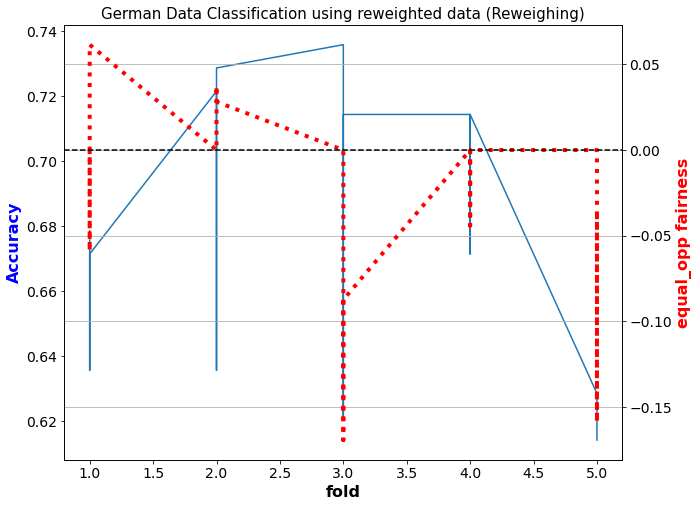

In [46]:
#plotting the results 
fig, ax1= plt.subplots(figsize=(10,8))
ax1.plot(german_df_transf['K_fold'], german_df_transf['LR_accuracies'])
ax1.set_xlabel('fold', fontsize=16, fontweight='bold')
ax1.set_ylabel('Accuracy', color='b', fontsize=16, fontweight='bold')
ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)


ax2= ax1.twinx()
ax2.plot(german_df_transf['K_fold'], german_df_transf['LR_fairness'],color='r', linestyle=':',linewidth=4)
ax2.set_ylabel('equal_opp fairness', color='r', fontsize=16, fontweight='bold')
ax2.axhline(y=0,color='k',linestyle='--') #equal opp benchmark=0
ax2.yaxis.set_tick_params(labelsize=14)
plt.title("German Data Classification using reweighted data (Reweighing)", fontsize= 15)
ax2.grid(True);

In [47]:
#Maximum accuracy achieved by the model with reweighing 
print(f" Maximum accuracy of model can be found in row {german_df_transf['LR_accuracies'].idxmax()}\n")
german_df_transf.iloc[24]

 Maximum accuracy of model can be found in row 64



LR_accuracies    0.671429
LR_fairness      0.061538
C                    10.0
Solver               saga
penalty                l1
K_fold                  1
Name: 24, dtype: object

In [48]:
#Best fairness with reweighing 
best_fairness_rw=german_df_transf.loc[german_df_transf['LR_fairness']==0]
best_fairness_rw.head()

,LR_accuracies,LR_fairness,C,Solver,penalty,K_fold
0,0.678571,0.0,0.001,saga,l1,1
1,0.678571,0.0,0.001,saga,l2,1
2,0.678571,0.0,0.001,liblinear,l1,1
4,0.678571,0.0,0.100,saga,l1,1
6,0.678571,0.0,0.100,liblinear,l1,1


In [49]:
#Evaluating the LR classifier on the test set for accuracy parameters after reweighing is done (classifier 7)
LR_learner_german_test_accrw= LogisticRegression(C=1.0,solver="saga",penalty="l1",random_state=0)
LR_learner_german_test_accrw.fit(german_x_train,german_y_train, sample_weight=german_train_transf.instance_weights)
predictions_test_accrw=LR_learner_german_test_accrw.predict(german_x_test)
german_main_test_pred_accrw= german_test.copy()
german_main_test_pred_accrw.labels= predictions_test_accrw
german_acc_test_metric_rw= ClassificationMetric(german_test, german_main_test_pred_accrw,unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)
german_equal_opp_test_accrw= german_acc_test_metric_rw.equal_opportunity_difference()
print(f"Accuracy of Logistic Regression on german reweighted testing data = {sum(predictions_test_accrw==german_y_test)/len(german_y_test)}, and fairness on german reweighted={german_equal_opp_test_accrw}")

#it can be noticed that the model's accuracy on the test set is close to the cv acc score, so the model is performing well accuracy wise

Accuracy of Logistic Regression on german reweighted testing data = 0.7166666666666667, and fairness on german reweighted=-0.05888697152717859


In [50]:
#Evaluating the LR classifier on the test set for fairness parameters after reweighing is done (classifier 8)
LR_learner_german_test_frw = LogisticRegression(C=1.0, solver='saga', penalty='l1', random_state=0)
LR_learner_german_test_frw.fit(german_x_train,german_y_train, sample_weight= german_train_transf.instance_weights) #fitting with reweighted weights 
german_predictions_test_frw = LR_learner_german_test_frw.predict(german_x_test)
german_main_test_pred_frw = german_test.copy()
german_main_test_pred_frw.labels = german_predictions_test_frw
german_fr_test_metric_rw = ClassificationMetric(german_test, german_main_test_pred_frw, unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)
german_equal_opp_test_rw = german_fr_test_metric_rw.equal_opportunity_difference()
print(f"Accuracy of Logistic Regression on german reweighted testing data={sum(german_predictions_test_frw==german_y_test)/len(german_y_test)},Fairness of Logistic Regression on the german test set using reweighing = {german_equal_opp_test_rw}")

# The fairness on the test set is very close to the cv score with a tiny amount of bias(5.8%) twords the privalaged group 

Accuracy of Logistic Regression on german reweighted testing data=0.7166666666666667,Fairness of Logistic Regression on the german test set using reweighing = -0.05888697152717859


#Task 3 


##Adult Dataset

In [51]:
C_LR=[0.001,0.005,0.01,0.1,1,10,20,100,200,1000] #
solver_LR=['saga', 'liblinear']
penalty_LR=['l1','l2']

adult_fair_task3= []
adult_standard_task3= []

kf_cv= KFold(n_splits=5, random_state=42, shuffle=True) #k_fold cross validation 
for k_fold, (train_idx,test_idx) in enumerate(kf_cv.split(adult_x_train,adult_y_train)):
  #print("train", train_idx, "test", test_idx)
  x_train_kf, x_test_kf= adult_x_train[train_idx], adult_x_train[test_idx]
  y_train_kf, y_test_kf = adult_y_train[train_idx], adult_y_train[test_idx]

  #trying the k_fold with different hyperparameter combinations  on the model 
  for c in C_LR:
    for solver in solver_LR:
      for penalty in penalty_LR:
        print(f"C= {c}, solver= {solver}, penalty= {penalty}, fold= {k_fold+1}")
       
        #Fair classifier
        fair_LR_learner=LogisticRegression(C=c,solver=solver,penalty=penalty)#Fair classifier
        fair_LR_learner.fit(x_train_kf,y_train_kf,sample_weight=adult_train_transf.instance_weights[train_idx]) #fitting the folds for the fair model 
        fair_predictions= fair_LR_learner.predict(x_test_kf) #predicting the outcome on the test fold 
        fair_test_pred= yt_data_copied.subset(test_idx)
        fair_test_pred.labels= fair_predictions
        fair_fairness_metric= ClassificationMetric(yt_data_copied.subset(test_idx),fair_test_pred , unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)
        fair_acc= fair_fairness_metric.accuracy()
        fair_error= fair_fairness_metric.error_rate()
        fair_fpr= fair_fairness_metric.false_positive_rate()
        fair_tpr= fair_fairness_metric.true_positive_rate()
        fair_tp= fair_fairness_metric.num_true_positives()
        fair_tn= fair_fairness_metric.num_true_negatives()
        fair_fp = fair_fairness_metric.num_false_positives()
        fair_fn = fair_fairness_metric.num_false_negatives()
        #Standard Classifier
        standard_LR_learner= LogisticRegression(C=c,solver=solver,penalty=penalty)
        standard_LR_learner.fit(x_train_kf,y_train_kf)
        standard_predictions= standard_LR_learner.predict(x_test_kf)
        standard_test_pred=yt_data_copied.subset(test_idx)
        standard_test_pred.labels= standard_predictions
        standard_fairness_metric= ClassificationMetric(yt_data_copied.subset(test_idx),standard_test_pred,unprivileged_groups=adult_unprivileged_groups,privileged_groups=adult_privileged_groups)
        standard_acc= standard_fairness_metric.accuracy()
        standard_error= standard_fairness_metric.error_rate()
        standard_fpr= standard_fairness_metric.false_positive_rate()
        standard_tpr= standard_fairness_metric.true_positive_rate()
        standard_tp= standard_fairness_metric.num_true_positives()
        standard_tn= standard_fairness_metric.num_true_negatives()
        standard_fp = standard_fairness_metric.num_false_positives()
        standard_fn = standard_fairness_metric.num_false_negatives()
        #appending the results
        adult_fair_task3.append((fair_acc,fair_error,fair_fpr,fair_tpr,fair_tp,fair_tn,fair_fp,fair_fn,c,solver,penalty,k_fold+1))
        adult_standard_task3.append((standard_acc,standard_error,standard_fpr,standard_tpr,standard_tp,standard_tn,standard_fp,standard_fn,c,solver,penalty,k_fold+1))

C= 0.001, solver= saga, penalty= l1, fold= 1
C= 0.001, solver= saga, penalty= l2, fold= 1
C= 0.001, solver= liblinear, penalty= l1, fold= 1
C= 0.001, solver= liblinear, penalty= l2, fold= 1
C= 0.005, solver= saga, penalty= l1, fold= 1
C= 0.005, solver= saga, penalty= l2, fold= 1
C= 0.005, solver= liblinear, penalty= l1, fold= 1
C= 0.005, solver= liblinear, penalty= l2, fold= 1
C= 0.01, solver= saga, penalty= l1, fold= 1
C= 0.01, solver= saga, penalty= l2, fold= 1
C= 0.01, solver= liblinear, penalty= l1, fold= 1
C= 0.01, solver= liblinear, penalty= l2, fold= 1
C= 0.1, solver= saga, penalty= l1, fold= 1
C= 0.1, solver= saga, penalty= l2, fold= 1
C= 0.1, solver= liblinear, penalty= l1, fold= 1
C= 0.1, solver= liblinear, penalty= l2, fold= 1
C= 1, solver= saga, penalty= l1, fold= 1
C= 1, solver= saga, penalty= l2, fold= 1
C= 1, solver= liblinear, penalty= l1, fold= 1
C= 1, solver= liblinear, penalty= l2, fold= 1
C= 10, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 1
C= 10, solver= liblinear, penalty= l1, fold= 1
C= 10, solver= liblinear, penalty= l2, fold= 1
C= 20, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 1
C= 20, solver= liblinear, penalty= l1, fold= 1
C= 20, solver= liblinear, penalty= l2, fold= 1
C= 100, solver= saga, penalty= l1, fold= 1


The max_iter was reached which means the coef_ did not converge


C= 100, solver= saga, penalty= l2, fold= 1
C= 100, solver= liblinear, penalty= l1, fold= 1
C= 100, solver= liblinear, penalty= l2, fold= 1
C= 200, solver= saga, penalty= l1, fold= 1
C= 200, solver= saga, penalty= l2, fold= 1
C= 200, solver= liblinear, penalty= l1, fold= 1
C= 200, solver= liblinear, penalty= l2, fold= 1
C= 1000, solver= saga, penalty= l1, fold= 1
C= 1000, solver= saga, penalty= l2, fold= 1
C= 1000, solver= liblinear, penalty= l1, fold= 1
C= 1000, solver= liblinear, penalty= l2, fold= 1
C= 0.001, solver= saga, penalty= l1, fold= 2
C= 0.001, solver= saga, penalty= l2, fold= 2
C= 0.001, solver= liblinear, penalty= l1, fold= 2
C= 0.001, solver= liblinear, penalty= l2, fold= 2
C= 0.005, solver= saga, penalty= l1, fold= 2
C= 0.005, solver= saga, penalty= l2, fold= 2
C= 0.005, solver= liblinear, penalty= l1, fold= 2
C= 0.005, solver= liblinear, penalty= l2, fold= 2
C= 0.01, solver= saga, penalty= l1, fold= 2
C= 0.01, solver= saga, penalty= l2, fold= 2
C= 0.01, solver= liblinea

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 2
C= 10, solver= liblinear, penalty= l1, fold= 2
C= 10, solver= liblinear, penalty= l2, fold= 2
C= 20, solver= saga, penalty= l1, fold= 2


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 2
C= 20, solver= liblinear, penalty= l1, fold= 2
C= 20, solver= liblinear, penalty= l2, fold= 2
C= 100, solver= saga, penalty= l1, fold= 2


The max_iter was reached which means the coef_ did not converge


C= 100, solver= saga, penalty= l2, fold= 2
C= 100, solver= liblinear, penalty= l1, fold= 2
C= 100, solver= liblinear, penalty= l2, fold= 2
C= 200, solver= saga, penalty= l1, fold= 2
C= 200, solver= saga, penalty= l2, fold= 2
C= 200, solver= liblinear, penalty= l1, fold= 2
C= 200, solver= liblinear, penalty= l2, fold= 2
C= 1000, solver= saga, penalty= l1, fold= 2
C= 1000, solver= saga, penalty= l2, fold= 2
C= 1000, solver= liblinear, penalty= l1, fold= 2
C= 1000, solver= liblinear, penalty= l2, fold= 2
C= 0.001, solver= saga, penalty= l1, fold= 3
C= 0.001, solver= saga, penalty= l2, fold= 3
C= 0.001, solver= liblinear, penalty= l1, fold= 3
C= 0.001, solver= liblinear, penalty= l2, fold= 3
C= 0.005, solver= saga, penalty= l1, fold= 3
C= 0.005, solver= saga, penalty= l2, fold= 3
C= 0.005, solver= liblinear, penalty= l1, fold= 3
C= 0.005, solver= liblinear, penalty= l2, fold= 3
C= 0.01, solver= saga, penalty= l1, fold= 3
C= 0.01, solver= saga, penalty= l2, fold= 3
C= 0.01, solver= liblinea

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 3
C= 10, solver= liblinear, penalty= l1, fold= 3
C= 10, solver= liblinear, penalty= l2, fold= 3
C= 20, solver= saga, penalty= l1, fold= 3


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 3
C= 20, solver= liblinear, penalty= l1, fold= 3
C= 20, solver= liblinear, penalty= l2, fold= 3
C= 100, solver= saga, penalty= l1, fold= 3
C= 100, solver= saga, penalty= l2, fold= 3
C= 100, solver= liblinear, penalty= l1, fold= 3
C= 100, solver= liblinear, penalty= l2, fold= 3
C= 200, solver= saga, penalty= l1, fold= 3
C= 200, solver= saga, penalty= l2, fold= 3
C= 200, solver= liblinear, penalty= l1, fold= 3
C= 200, solver= liblinear, penalty= l2, fold= 3
C= 1000, solver= saga, penalty= l1, fold= 3
C= 1000, solver= saga, penalty= l2, fold= 3
C= 1000, solver= liblinear, penalty= l1, fold= 3
C= 1000, solver= liblinear, penalty= l2, fold= 3
C= 0.001, solver= saga, penalty= l1, fold= 4
C= 0.001, solver= saga, penalty= l2, fold= 4
C= 0.001, solver= liblinear, penalty= l1, fold= 4
C= 0.001, solver= liblinear, penalty= l2, fold= 4
C= 0.005, solver= saga, penalty= l1, fold= 4
C= 0.005, solver= saga, penalty= l2, fold= 4
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 4
C= 10, solver= liblinear, penalty= l1, fold= 4
C= 10, solver= liblinear, penalty= l2, fold= 4
C= 20, solver= saga, penalty= l1, fold= 4


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 4
C= 20, solver= liblinear, penalty= l1, fold= 4
C= 20, solver= liblinear, penalty= l2, fold= 4
C= 100, solver= saga, penalty= l1, fold= 4
C= 100, solver= saga, penalty= l2, fold= 4
C= 100, solver= liblinear, penalty= l1, fold= 4
C= 100, solver= liblinear, penalty= l2, fold= 4
C= 200, solver= saga, penalty= l1, fold= 4
C= 200, solver= saga, penalty= l2, fold= 4
C= 200, solver= liblinear, penalty= l1, fold= 4
C= 200, solver= liblinear, penalty= l2, fold= 4
C= 1000, solver= saga, penalty= l1, fold= 4
C= 1000, solver= saga, penalty= l2, fold= 4
C= 1000, solver= liblinear, penalty= l1, fold= 4
C= 1000, solver= liblinear, penalty= l2, fold= 4
C= 0.001, solver= saga, penalty= l1, fold= 5
C= 0.001, solver= saga, penalty= l2, fold= 5
C= 0.001, solver= liblinear, penalty= l1, fold= 5
C= 0.001, solver= liblinear, penalty= l2, fold= 5
C= 0.005, solver= saga, penalty= l1, fold= 5
C= 0.005, solver= saga, penalty= l2, fold= 5
C= 0.005, solver= liblinear, penal

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 10, solver= saga, penalty= l2, fold= 5
C= 10, solver= liblinear, penalty= l1, fold= 5
C= 10, solver= liblinear, penalty= l2, fold= 5
C= 20, solver= saga, penalty= l1, fold= 5


The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 20, solver= saga, penalty= l2, fold= 5
C= 20, solver= liblinear, penalty= l1, fold= 5
C= 20, solver= liblinear, penalty= l2, fold= 5
C= 100, solver= saga, penalty= l1, fold= 5
C= 100, solver= saga, penalty= l2, fold= 5
C= 100, solver= liblinear, penalty= l1, fold= 5
C= 100, solver= liblinear, penalty= l2, fold= 5
C= 200, solver= saga, penalty= l1, fold= 5
C= 200, solver= saga, penalty= l2, fold= 5
C= 200, solver= liblinear, penalty= l1, fold= 5
C= 200, solver= liblinear, penalty= l2, fold= 5
C= 1000, solver= saga, penalty= l1, fold= 5
C= 1000, solver= saga, penalty= l2, fold= 5
C= 1000, solver= liblinear, penalty= l1, fold= 5
C= 1000, solver= liblinear, penalty= l2, fold= 5


In [52]:
#Adult fair df 
adult_fair_df=pd.DataFrame(data=adult_fair_task3, columns=["Accuracy","error","fpr","tpr",'tp','tn','fp','fn',"C","solver","penalty","Fold"])
adult_fair_df.head()

,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
0,0.758555,0.241445,0.000000,0.000000,0.0,5187.0,0.0,1651.0,0.001,saga,l1,1
1,0.783124,0.216876,0.050704,0.261054,431.0,4924.0,263.0,1220.0,0.001,saga,l2,1
2,0.783709,0.216291,0.054752,0.276196,456.0,4903.0,284.0,1195.0,0.001,liblinear,l1,1
3,0.786195,0.213805,0.103721,0.440339,727.0,4649.0,538.0,924.0,0.001,liblinear,l2,1
4,0.786195,0.213805,0.103721,0.440339,727.0,4649.0,538.0,924.0,0.005,saga,l1,1


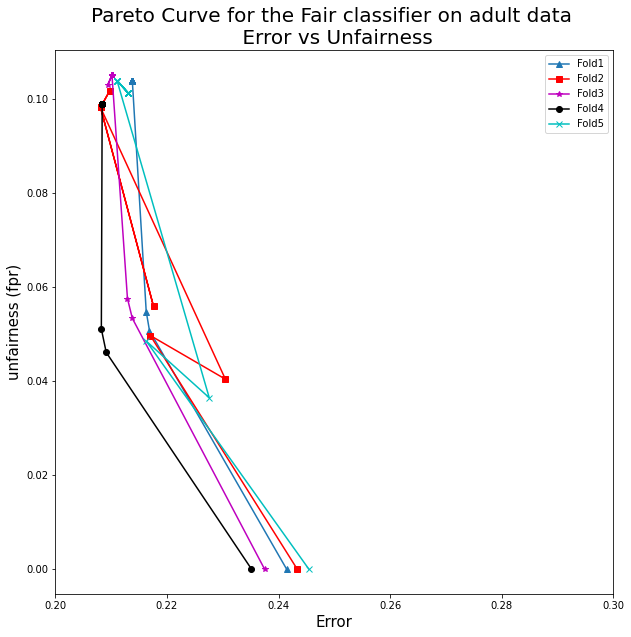

In [53]:
#Error vs false positive rate(unfairness) pareto curve for the fair classifier on the adult dataset 
plt.figure(figsize=(10,10))
plt.plot(adult_fair_df['error'][:40],adult_fair_df['fpr'][:40],marker='^');
plt.plot(adult_fair_df['error'][40:80],adult_fair_df['fpr'][40:80],color='r',marker='s')
plt.plot(adult_fair_df['error'][80:120],adult_fair_df['fpr'][80:120],color='m',marker='*')
plt.plot(adult_fair_df['error'][120:160],adult_fair_df['fpr'][120:160],color='k', marker='o')
plt.plot(adult_fair_df['error'][160:200],adult_fair_df['fpr'][160:200],color='c',marker='x')
plt.xlabel('Error',fontsize=15)
plt.xlim(0.2,0.3)
plt.ylabel("unfairness (fpr)",fontsize=15)
labels=["Fold1","Fold2","Fold3","Fold4","Fold5"]
plt.legend(labels=labels)
plt.title("Pareto Curve for the Fair classifier on adult data \n Error vs Unfairness",fontsize=20);

In [54]:
#so here my choice for the hyperparameters would yield an accuracy of 0.790875 and unfairness(false positive rate) of 0.046080  on the pareto curve for fold number 4 (Classifier number 9)
adult_fair_df[120:160].head()

,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
120,0.764844,0.235156,0.000000,0.000000,0.0,5230.0,0.0,1608.0,0.001,saga,l1,4
121,0.790875,0.209125,0.046080,0.260572,419.0,4989.0,241.0,1189.0,0.001,saga,l2,4
122,0.791752,0.208248,0.051052,0.280473,451.0,4963.0,267.0,1157.0,0.001,liblinear,l1,4
123,0.791606,0.208394,0.098853,0.435323,700.0,4713.0,517.0,908.0,0.001,liblinear,l2,4
124,0.791606,0.208394,0.098853,0.435323,700.0,4713.0,517.0,908.0,0.005,saga,l1,4


In [55]:
#Training the fair classifier on the testing data (Classifier 9)
LR_fair_task3= LogisticRegression(C=0.001, solver='saga', penalty='l2',random_state=0)
LR_fair_task3.fit(adult_x_train,adult_y_train, sample_weight=adult_train_transf.instance_weights)
test_predictions= LR_fair_task3.predict(adult_x_test)
fair_test_pred= adult_test.copy()
fair_test_pred.labels= test_predictions
test_fairness_metric= ClassificationMetric(adult_test,fair_test_pred , unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)
test_acc= test_fairness_metric.accuracy()
test_fpr= test_fairness_metric.false_positive_rate()
equal_opp= test_fairness_metric.equal_opportunity_difference()
print(f' accuracy on adult testing= {test_acc}, false positive rate on adult testing= {test_fpr}, equal opportunity difference= {equal_opp}')

 accuracy on adult testing= 0.7876885279464956, false positive rate on adult testing= 0.046287195067464926, equal opportunity difference= -0.03671676110700503


In [56]:
#Standard adult classifier dataframe
adult_standard_df=pd.DataFrame(data=adult_standard_task3, columns=["Accuracy","error","fpr","tpr",'tp','tn','fp','fn',"C","solver","penalty","Fold"])
adult_standard_df.head()

,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
0,0.793799,0.206201,0.029497,0.238643,394.0,5034.0,153.0,1257.0,0.001,saga,l1,1
1,0.803305,0.196695,0.060343,0.374924,619.0,4874.0,313.0,1032.0,0.001,saga,l2,1
2,0.802135,0.197865,0.068440,0.395518,653.0,4832.0,355.0,998.0,0.001,liblinear,l1,1
3,0.800673,0.199327,0.069019,0.391278,646.0,4829.0,358.0,1005.0,0.001,liblinear,l2,1
4,0.802281,0.197719,0.068248,0.395518,653.0,4833.0,354.0,998.0,0.005,saga,l1,1


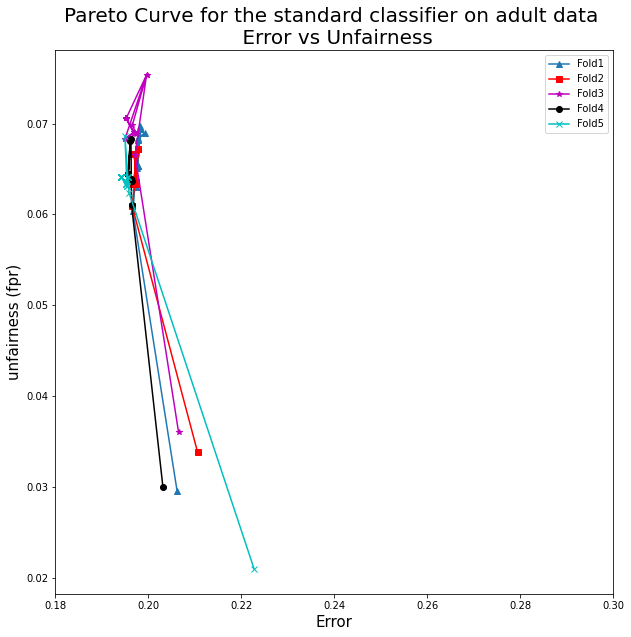

In [57]:
#plotting the Pareto curve for the Standard Classifier 
plt.figure(figsize=(10,10))
plt.plot(adult_standard_df['error'][:40],adult_standard_df['fpr'][:40],marker='^');
plt.plot(adult_standard_df['error'][40:80],adult_standard_df['fpr'][40:80],color='r',marker='s')
plt.plot(adult_standard_df['error'][80:120],adult_standard_df['fpr'][80:120],color='m',marker='*')
plt.plot(adult_standard_df['error'][120:160],adult_standard_df['fpr'][120:160],color='k', marker='o')
plt.plot(adult_standard_df['error'][160:200],adult_standard_df['fpr'][160:200],color='c',marker='x')
plt.xlabel('Error',fontsize=15)
plt.xlim(0.18,0.3)
plt.ylabel("unfairness (fpr)",fontsize=15)
labels=["Fold1","Fold2","Fold3","Fold4","Fold5"]
plt.legend(labels=labels)
plt.title("Pareto Curve for the standard classifier on adult data \n Error vs Unfairness",fontsize=20);

In [58]:
# Here my choice for the standard classifier's hyperparameters would yield an accuracy of 0.804329 and unfairness (false positive rate) 0.064436 on the pareto curve for fold number 4 (Classifier 10)
print(adult_standard_df[120:160]['Accuracy'].idxmax())
adult_standard_df[120:160].head()

123


,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
120,0.796870,0.203130,0.030019,0.233831,376.0,5073.0,157.0,1232.0,0.001,saga,l1,4
121,0.803598,0.196402,0.060994,0.363184,584.0,4911.0,319.0,1024.0,0.001,saga,l2,4
122,0.803744,0.196256,0.068260,0.387438,623.0,4873.0,357.0,985.0,0.001,liblinear,l1,4
123,0.804329,0.195671,0.064436,0.377488,607.0,4893.0,337.0,1001.0,0.001,liblinear,l2,4
124,0.803451,0.196549,0.063671,0.371269,597.0,4897.0,333.0,1011.0,0.005,saga,l1,4


In [59]:
#Testing the standard classifier on the testing data (classifier 10)
LR_standard_task3= LogisticRegression(C=0.001, solver='liblinear', penalty='l2',random_state=0)
LR_standard_task3.fit(adult_x_train,adult_y_train)
test_predictions= LR_standard_task3.predict(adult_x_test)
fair_test_pred= adult_test.copy()
fair_test_pred.labels= test_predictions
test_fairness_metric= ClassificationMetric(adult_test,fair_test_pred , unprivileged_groups=adult_unprivileged_groups, privileged_groups=adult_privileged_groups)
test_acc= test_fairness_metric.accuracy()
test_fpr= test_fairness_metric.false_positive_rate()
equal_opp= test_fairness_metric.equal_opportunity_difference()
print(f' accuracy on adult testing= {test_acc}, false positive rate on adult testing= {test_fpr}, equal opportunity difference= {equal_opp}')

 accuracy on adult testing= 0.8050228622125162, false positive rate on adult testing= 0.061567330890894466, equal opportunity difference= -0.4356902356902357


##German Dataset

In [60]:
G_LR=[0.001,0.1,1,1.5,3,5,10,20] #
solver_LR=['saga', 'liblinear']
penalty_LR=['l1','l2']

german_fair_task3= []
german_standard_task3= []

kf_cv= KFold(n_splits=5, random_state=42, shuffle=True) #k_fold cross validation 
for k_fold, (train_idx,test_idx) in enumerate(kf_cv.split(german_x_train,german_y_train)):
  #print("train", train_idx, "test", test_idx)
  x_train_kf, x_test_kf= german_x_train[train_idx], german_x_train[test_idx]
  y_train_kf, y_test_kf = german_y_train[train_idx], german_y_train[test_idx]

  #trying the k_fold with different hyperparameter combinations  on the model 
  for c in G_LR:
    for solver in solver_LR:
      for penalty in penalty_LR:
        print(f"C= {c}, solver= {solver}, penalty= {penalty}, fold= {k_fold+1}")
       
        #Fair classifier
        german_fair_LR_learner=LogisticRegression(C=c,solver=solver,penalty=penalty)#Fair classifier
        german_fair_LR_learner.fit(x_train_kf,y_train_kf,sample_weight=german_train_transf.instance_weights[train_idx]) #fitting the folds for the fair model 
        german_fair_predictions= german_fair_LR_learner.predict(x_test_kf) #predicting the outcome on the test fold 
        german_fair_test_pred= german_yt_data_copied.subset(test_idx)
        german_fair_test_pred.labels= german_fair_predictions
        german_fair_fairness_metric= ClassificationMetric(german_yt_data_copied.subset(test_idx),german_fair_test_pred , unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)
        german_fair_acc= german_fair_fairness_metric.accuracy()
        german_fair_error= german_fair_fairness_metric.error_rate()
        german_fair_fpr= german_fair_fairness_metric.false_positive_rate()
        german_fair_tpr= german_fair_fairness_metric.true_positive_rate()
        german_fair_tp= german_fair_fairness_metric.num_true_positives()
        german_fair_tn= german_fair_fairness_metric.num_true_negatives()
        german_fair_fp = german_fair_fairness_metric.num_false_positives()
        german_fair_fn = german_fair_fairness_metric.num_false_negatives()
        
        #Standard Classifier
        german_standard_LR_learner= LogisticRegression(C=c,solver=solver,penalty=penalty)
        german_standard_LR_learner.fit(x_train_kf,y_train_kf)
        german_standard_predictions= german_standard_LR_learner.predict(x_test_kf)
        german_standard_test_pred= german_yt_data_copied.subset(test_idx)
        german_standard_test_pred.labels= german_standard_predictions
        german_standard_fairness_metric= ClassificationMetric(german_yt_data_copied.subset(test_idx),german_standard_test_pred,unprivileged_groups=german_unprivileged_groups,privileged_groups=german_privileged_groups)
        german_standard_acc= german_standard_fairness_metric.accuracy()
        german_standard_error= german_standard_fairness_metric.error_rate()
        german_standard_fpr= german_standard_fairness_metric.false_positive_rate()
        german_standard_tpr= german_standard_fairness_metric.true_positive_rate()
        german_standard_tp= german_standard_fairness_metric.num_true_positives()
        german_standard_tn= german_standard_fairness_metric.num_true_negatives()
        german_standard_fp = german_standard_fairness_metric.num_false_positives()
        german_standard_fn = german_standard_fairness_metric.num_false_negatives()

        #appending the results
        german_fair_task3.append((german_fair_acc,german_fair_error,german_fair_fpr,german_fair_tpr, german_fair_tp,german_fair_tn,german_fair_fp,german_fair_fn,c,solver,penalty,k_fold+1))
        german_standard_task3.append((german_standard_acc,german_standard_error,german_standard_fpr,german_standard_tpr,german_standard_tp,german_standard_tn,german_standard_fp,german_standard_fn,c,solver,penalty,k_fold+1))

C= 0.001, solver= saga, penalty= l1, fold= 1
C= 0.001, solver= saga, penalty= l2, fold= 1
C= 0.001, solver= liblinear, penalty= l1, fold= 1
C= 0.001, solver= liblinear, penalty= l2, fold= 1
C= 0.1, solver= saga, penalty= l1, fold= 1
C= 0.1, solver= saga, penalty= l2, fold= 1
C= 0.1, solver= liblinear, penalty= l1, fold= 1
C= 0.1, solver= liblinear, penalty= l2, fold= 1
C= 1, solver= saga, penalty= l1, fold= 1
C= 1, solver= saga, penalty= l2, fold= 1
C= 1, solver= liblinear, penalty= l1, fold= 1
C= 1, solver= liblinear, penalty= l2, fold= 1
C= 1.5, solver= saga, penalty= l1, fold= 1
C= 1.5, solver= saga, penalty= l2, fold= 1
C= 1.5, solver= liblinear, penalty= l1, fold= 1
C= 1.5, solver= liblinear, penalty= l2, fold= 1
C= 3, solver= saga, penalty= l1, fold= 1
C= 3, solver= saga, penalty= l2, fold= 1
C= 3, solver= liblinear, penalty= l1, fold= 1
C= 3, solver= liblinear, penalty= l2, fold= 1
C= 5, solver= saga, penalty= l1, fold= 1
C= 5, solver= saga, penalty= l2, fold= 1
C= 5, solver= li

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 0.001, solver= liblinear, penalty= l2, fold= 2
C= 0.1, solver= saga, penalty= l1, fold= 2
C= 0.1, solver= saga, penalty= l2, fold= 2
C= 0.1, solver= liblinear, penalty= l1, fold= 2
C= 0.1, solver= liblinear, penalty= l2, fold= 2
C= 1, solver= saga, penalty= l1, fold= 2
C= 1, solver= saga, penalty= l2, fold= 2
C= 1, solver= liblinear, penalty= l1, fold= 2
C= 1, solver= liblinear, penalty= l2, fold= 2
C= 1.5, solver= saga, penalty= l1, fold= 2
C= 1.5, solver= saga, penalty= l2, fold= 2
C= 1.5, solver= liblinear, penalty= l1, fold= 2
C= 1.5, solver= liblinear, penalty= l2, fold= 2
C= 3, solver= saga, penalty= l1, fold= 2
C= 3, solver= saga, penalty= l2, fold= 2
C= 3, solver= liblinear, penalty= l1, fold= 2
C= 3, solver= liblinear, penalty= l2, fold= 2
C= 5, solver= saga, penalty= l1, fold= 2
C= 5, solver= saga, penalty= l2, fold= 2
C= 5, solver= liblinear, penalty= l1, fold= 2
C= 5, solver= liblinear, penalty= l2, fold= 2
C= 10, solver= saga, penalty= l1, fold= 2
C= 10, solver= saga, p

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 0.001, solver= liblinear, penalty= l2, fold= 3
C= 0.1, solver= saga, penalty= l1, fold= 3
C= 0.1, solver= saga, penalty= l2, fold= 3
C= 0.1, solver= liblinear, penalty= l1, fold= 3
C= 0.1, solver= liblinear, penalty= l2, fold= 3
C= 1, solver= saga, penalty= l1, fold= 3
C= 1, solver= saga, penalty= l2, fold= 3
C= 1, solver= liblinear, penalty= l1, fold= 3
C= 1, solver= liblinear, penalty= l2, fold= 3
C= 1.5, solver= saga, penalty= l1, fold= 3
C= 1.5, solver= saga, penalty= l2, fold= 3
C= 1.5, solver= liblinear, penalty= l1, fold= 3
C= 1.5, solver= liblinear, penalty= l2, fold= 3
C= 3, solver= saga, penalty= l1, fold= 3
C= 3, solver= saga, penalty= l2, fold= 3
C= 3, solver= liblinear, penalty= l1, fold= 3
C= 3, solver= liblinear, penalty= l2, fold= 3
C= 5, solver= saga, penalty= l1, fold= 3
C= 5, solver= saga, penalty= l2, fold= 3
C= 5, solver= liblinear, penalty= l1, fold= 3
C= 5, solver= liblinear, penalty= l2, fold= 3
C= 10, solver= saga, penalty= l1, fold= 3
C= 10, solver= saga, p

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 20, solver= liblinear, penalty= l2, fold= 3
C= 0.001, solver= saga, penalty= l1, fold= 4
C= 0.001, solver= saga, penalty= l2, fold= 4
C= 0.001, solver= liblinear, penalty= l1, fold= 4
C= 0.001, solver= liblinear, penalty= l2, fold= 4
C= 0.1, solver= saga, penalty= l1, fold= 4
C= 0.1, solver= saga, penalty= l2, fold= 4
C= 0.1, solver= liblinear, penalty= l1, fold= 4
C= 0.1, solver= liblinear, penalty= l2, fold= 4
C= 1, solver= saga, penalty= l1, fold= 4
C= 1, solver= saga, penalty= l2, fold= 4
C= 1, solver= liblinear, penalty= l1, fold= 4
C= 1, solver= liblinear, penalty= l2, fold= 4
C= 1.5, solver= saga, penalty= l1, fold= 4
C= 1.5, solver= saga, penalty= l2, fold= 4
C= 1.5, solver= liblinear, penalty= l1, fold= 4
C= 1.5, solver= liblinear, penalty= l2, fold= 4
C= 3, solver= saga, penalty= l1, fold= 4
C= 3, solver= saga, penalty= l2, fold= 4
C= 3, solver= liblinear, penalty= l1, fold= 4
C= 3, solver= liblinear, penalty= l2, fold= 4
C= 5, solver= saga, penalty= l1, fold= 4
C= 5, solv

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


C= 0.001, solver= liblinear, penalty= l2, fold= 5
C= 0.1, solver= saga, penalty= l1, fold= 5
C= 0.1, solver= saga, penalty= l2, fold= 5
C= 0.1, solver= liblinear, penalty= l1, fold= 5
C= 0.1, solver= liblinear, penalty= l2, fold= 5
C= 1, solver= saga, penalty= l1, fold= 5
C= 1, solver= saga, penalty= l2, fold= 5
C= 1, solver= liblinear, penalty= l1, fold= 5
C= 1, solver= liblinear, penalty= l2, fold= 5
C= 1.5, solver= saga, penalty= l1, fold= 5
C= 1.5, solver= saga, penalty= l2, fold= 5
C= 1.5, solver= liblinear, penalty= l1, fold= 5
C= 1.5, solver= liblinear, penalty= l2, fold= 5
C= 3, solver= saga, penalty= l1, fold= 5
C= 3, solver= saga, penalty= l2, fold= 5
C= 3, solver= liblinear, penalty= l1, fold= 5
C= 3, solver= liblinear, penalty= l2, fold= 5
C= 5, solver= saga, penalty= l1, fold= 5
C= 5, solver= saga, penalty= l2, fold= 5
C= 5, solver= liblinear, penalty= l1, fold= 5
C= 5, solver= liblinear, penalty= l2, fold= 5
C= 10, solver= saga, penalty= l1, fold= 5
C= 10, solver= saga, p

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge


In [61]:
german_fair_df= pd.DataFrame(data=german_fair_task3, columns=["Accuracy","error","fpr","tpr",'tp','tn','fp','fn',"C","solver","penalty","Fold"])
german_fair_df

,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
0,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.001,saga,l1,1
1,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.001,saga,l2,1
2,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.001,liblinear,l1,1
3,0.635714,0.364286,0.866667,0.873684,83.0,6.0,39.0,12.0,0.001,liblinear,l2,1
4,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.100,saga,l1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.614286,0.385714,0.884615,0.909091,80.0,6.0,46.0,8.0,10.000,liblinear,l2,5
156,0.614286,0.385714,0.884615,0.909091,80.0,6.0,46.0,8.0,20.000,saga,l1,5
157,0.614286,0.385714,0.884615,0.909091,80.0,6.0,46.0,8.0,20.000,saga,l2,5
158,0.614286,0.385714,0.884615,0.909091,80.0,6.0,46.0,8.0,20.000,liblinear,l1,5


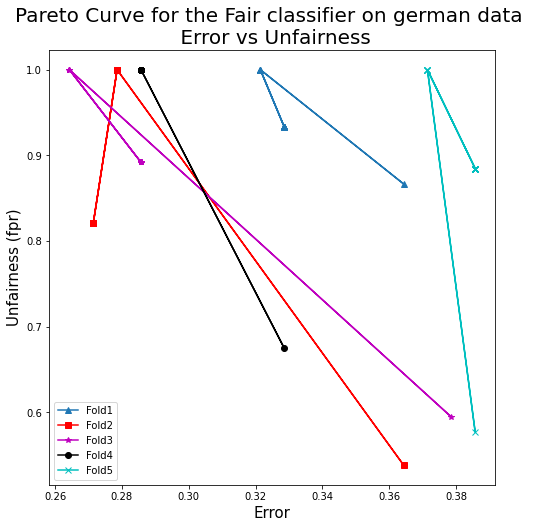

In [62]:
#plotting the Pareto curve for the fair classifier 
plt.figure(figsize=(8,8))
plt.plot(german_fair_df['error'][:32],german_fair_df['fpr'][:32],marker='^');
plt.plot(german_fair_df['error'][32:64],german_fair_df['fpr'][32:64],color='r',marker='s')
plt.plot(german_fair_df['error'][64:96],german_fair_df['fpr'][64:96],color='m', marker='*')
plt.plot(german_fair_df['error'][96:128],german_fair_df['fpr'][96:128],color='k', marker='o')
plt.plot(german_fair_df['error'][128:160],german_fair_df['fpr'][128:160],color='c', marker='x')
plt.xlabel('Error',fontsize=15)
plt.ylabel("Unfairness (fpr)",fontsize=15)
#plt.axvline(x=267,linestyle="--",color="b")
labels=["Fold1","Fold2","Fold3","Fold4","Fold5"]
plt.legend(labels=labels)
plt.title("Pareto Curve for the Fair classifier on german data \n Error vs Unfairness",fontsize=20);

In [63]:
print(german_fair_df[32:64]['fpr'].idxmin())
german_fair_df[32:64].head()
#for the german fair classifier I am gonna pick the classifier which gives the best fpr= 0.538462 and accuracy of 0.635714 (model 11)

35


,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
32,0.721429,0.278571,1.000000,1.00000,101.0,0.0,39.0,0.0,0.001,saga,l1,2
33,0.721429,0.278571,1.000000,1.00000,101.0,0.0,39.0,0.0,0.001,saga,l2,2
34,0.721429,0.278571,1.000000,1.00000,101.0,0.0,39.0,0.0,0.001,liblinear,l1,2
35,0.635714,0.364286,0.538462,0.70297,71.0,18.0,21.0,30.0,0.001,liblinear,l2,2
36,0.721429,0.278571,1.000000,1.00000,101.0,0.0,39.0,0.0,0.100,saga,l1,2


In [64]:
#Testing the fair classifier on the german testing data (classifier 11)
LR_german_task3= LogisticRegression(C=0.001, solver='liblinear', penalty='l2',random_state=0)
LR_german_task3.fit(german_x_train,german_y_train, sample_weight=german_train_transf.instance_weights)
test_predictions= LR_german_task3.predict(german_x_test)
fair_test_pred= german_test.copy()
fair_test_pred.labels= test_predictions
test_fairness_metric= ClassificationMetric(german_test,fair_test_pred , unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)
test_acc= test_fairness_metric.accuracy()
test_fpr= test_fairness_metric.false_positive_rate()
equal_opp= test_fairness_metric.equal_opportunity_difference()
print(f' accuracy on german testing= {test_acc}, false positive rate on german testing= {test_fpr}, equal opportunity difference= {equal_opp}')

 accuracy on german testing= 0.6533333333333333, false positive rate on german testing= 0.6436781609195402, equal opportunity difference= -0.2125754961173425


In [65]:
# German data for the standard classifier 
german_standard_df=pd.DataFrame(data=german_standard_task3, columns=["Accuracy","error","fpr","tpr",'tp','tn','fp','fn',"C","solver","penalty","Fold"])
german_standard_df

,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
0,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.001,saga,l1,1
1,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.001,saga,l2,1
2,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.001,liblinear,l1,1
3,0.692857,0.307143,0.711111,0.884211,84.0,13.0,32.0,11.0,0.001,liblinear,l2,1
4,0.678571,0.321429,1.000000,1.000000,95.0,0.0,45.0,0.0,0.100,saga,l1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.592857,0.407143,0.865385,0.863636,76.0,7.0,45.0,12.0,10.000,liblinear,l2,5
156,0.592857,0.407143,0.865385,0.863636,76.0,7.0,45.0,12.0,20.000,saga,l1,5
157,0.592857,0.407143,0.865385,0.863636,76.0,7.0,45.0,12.0,20.000,saga,l2,5
158,0.592857,0.407143,0.865385,0.863636,76.0,7.0,45.0,12.0,20.000,liblinear,l1,5


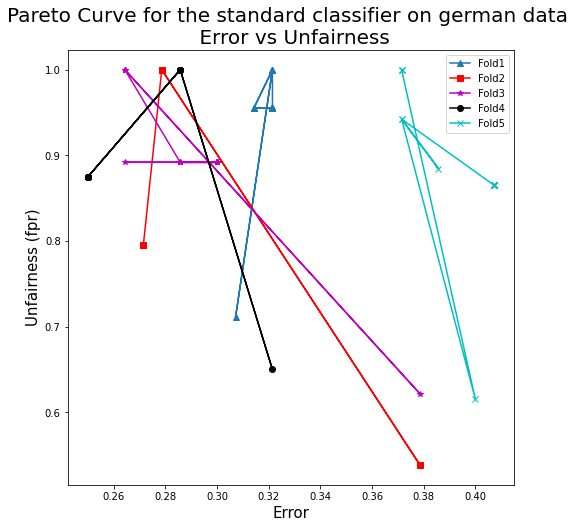

In [66]:
#plotting the Pareto curve for the Standard Classifier 
plt.figure(figsize=(8,8))
plt.plot(german_standard_df['error'][:32],german_standard_df['fpr'][:32],marker='^');
plt.plot(german_standard_df['error'][32:64],german_standard_df['fpr'][32:64],color='r',marker='s')
plt.plot(german_standard_df['error'][64:96],german_standard_df['fpr'][64:96],color='m', marker='*')
plt.plot(german_standard_df['error'][96:128],german_standard_df['fpr'][96:128],color='k', marker='o')
plt.plot(german_standard_df['error'][128:160],german_standard_df['fpr'][128:160],color='c', marker='x')
plt.xlabel('Error',fontsize=15)
plt.ylabel("Unfairness (fpr)",fontsize=15)
#plt.axvline(x=267,linestyle="--",color="b")
labels=["Fold1","Fold2","Fold3","Fold4","Fold5"]
plt.legend(labels=labels)
plt.title("Pareto Curve for the standard classifier on german data \n Error vs Unfairness",fontsize=20);

In [67]:
print(german_standard_df[96:120]['Accuracy'].idxmax())
german_standard_df[96:120].head(6) 
#for the most accurate classifier I am going to pick the classifier in fold 4 which gives me 0.75 Accuracy and 0.875 fpr 

101


,Accuracy,error,fpr,tpr,tp,tn,fp,fn,C,solver,penalty,Fold
96,0.714286,0.285714,1.000,1.00,100.0,0.0,40.0,0.0,0.001,saga,l1,4
97,0.714286,0.285714,1.000,1.00,100.0,0.0,40.0,0.0,0.001,saga,l2,4
98,0.714286,0.285714,1.000,1.00,100.0,0.0,40.0,0.0,0.001,liblinear,l1,4
99,0.678571,0.321429,0.650,0.81,81.0,14.0,26.0,19.0,0.001,liblinear,l2,4
100,0.714286,0.285714,1.000,1.00,100.0,0.0,40.0,0.0,0.100,saga,l1,4
101,0.750000,0.250000,0.875,1.00,100.0,5.0,35.0,0.0,0.100,saga,l2,4


In [68]:
#Testing the standard classifier on the german testing data (classifier 12)
german_LR_standard_task3= LogisticRegression(C=0.1, solver='saga', penalty='l2',random_state=0)
german_LR_standard_task3.fit(german_x_train,german_y_train)
test_predictions= german_LR_standard_task3.predict(german_x_test)
fair_test_pred= german_test.copy()
fair_test_pred.labels= test_predictions
test_fairness_metric= ClassificationMetric(german_test,fair_test_pred , unprivileged_groups=german_unprivileged_groups, privileged_groups=german_privileged_groups)
test_acc= test_fairness_metric.accuracy()
test_fpr= test_fairness_metric.false_positive_rate()
equal_opp= test_fairness_metric.equal_opportunity_difference()
print(f' accuracy on german testing= {test_acc}, false positive rate on german testing= {test_fpr}, equal opportunity difference= {equal_opp}')

 accuracy on german testing= 0.7166666666666667, false positive rate on german testing= 0.8390804597701149, equal opportunity difference= -0.05888697152717859
